# Assignment 4

# Part I: K-means Segmentation

## Problem 1 (soft-max)
### Following the material on slide 54 in topic 9, derive the optimal "soft" clustering (distribution over clusters) at point $p$ $${\mathbf S}_p=\{S_p^k\;|\;1\leq k\leq K,\; S_p^k\geq 0,\; \sum_k S_P^k=1\}$$ that Lloyd's algorithm would obtain when re-estimating segmentation for fixed cluster models parameters $\mu_k$.  Note that the total K-means objective $E({\mathbf S},\mu)$ as a function of segmentation $\mathbf S$ (when $\mu$ is fixed) is a sum of independent terms for every pixel. When computing optimal distribution ${\mathbf S}_p$ it is enough to focus on the terms dependent only on its components $S_p^k$. For the K-means formulation on slide 54, these terms are $$-\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p) \quad\quad\quad\quad\quad\quad (*)$$ where constant $a_p^k := \log P(f_p|\mu_k)$  (assuming fixed  $\mu$) corresponds to $k$-th cluster's log-likelihood at the observed feature point $f_p$, constant $T$ represents a so-called "temperature" parameter, and $H({\mathbf S}_p):=-\sum_k S_p^k \log S_p^k$ is the entropy of distribution ${\mathbf S}_p$. 
### Use your solution to show what happens with the optimal distribution $S_p$ when the temperature parameter reduces to zero $T\longrightarrow 0$.
### HINT 1: Since optimization over ${\mathbf S}_p$  must be done over probability distributions, you should use Lagrangian formulation that combines the constraint $\sum_k S_p^k=1$ with $(*)$ into the <i>Lagrangian</i>: $$L({\mathbf S}_p,\lambda) \;=\; -\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right) \quad\quad\quad\quad (**)$$ where Lagrange multiplier $\lambda$ is an additional optimization variable. 
### HINT 2: Similarly to optimization in single-variate functions, you can find extrema points for the multi-variate Lagrangian $(**)$ by finding values of variables $(S_p^1,\dots,S_p^K,\lambda)$ where its derivative (gradient) equals zero.  That is, the whole problem boils down to solving the system of $K+1$ equations $\nabla L = {\mathbf 0}$ for the Lagrangian in $(**)$.
### HINT 3: The  goal of this excercise is to see how adding the entropy affects a linear loss. Optimization of $(*)$ over distributions ${\mathbf S}_p$ should result in the, so-called, <font color="red">soft-max operator</font> applicable to arbitrary $K$ potentials $\{a_p^k\,|\,1\leq k\leq K\}$.

Solution:

We solve $K + 1$ equations by solving the following vector:

$$\nabla L = \left[\begin{array}{cc}
\frac{\partial L}{\partial {S^1}_p} \\
\vdots \\
\frac{\partial L}{\partial {S^K}_p} \\
\frac{\partial L}{\partial \lambda} \\ 
\end{array}\right] = \vec{0}
$$

For a ${S^j}_p$ such that $1 \leq j \leq K$:

$$\begin{aligned}
\frac{\partial L}{\partial S_p^j}
    &= \frac{\partial}{\partial S_p^j}\left(-\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right)\right) = 0\\
    &= -a_p^j \;-\; T\;\frac{\partial}{\partial S_p^j}\left(-\sum_{k}S_p^k \log S_p^k\right)\; +\;\lambda = 0\\
    &= -a_p^j \;+\; T\;\left(\log S_p^j + 1\right)\; +\;\lambda = 0\\
\end{aligned}$$

Solving for $S_p^j$:

$$ S_p^j = \frac{e^\frac{a_p^j}{T}}{e^{\frac{\lambda}{T} + 1}} $$

For $\lambda$:

$$\begin{aligned}
\frac{\partial L}{\partial \lambda}
    &= \frac{\partial}{\partial \lambda}\left(-\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right)\right) = 0\\
    &= \sum_{k=1}^K S_p^k - 1 = 0\\
    &= S_p^1 + \ldots + S_p^k = 1\\
\end{aligned}$$

Combining the equations for $\lambda$ and $S_p^j$:

First solving for $\lambda$:

$$\begin{aligned}
S_p^1 + \ldots + S_p^k &= 1\\
\frac{e^\frac{a_p^1}{T}}{e^{\frac{\lambda}{T} + 1}} + \ldots + \frac{e^\frac{a_p^k}{T}}{e^{\frac{\lambda}{T} + 1}} &= 1\\
e^\frac{a_p^1}{T} + \ldots + e^\frac{a_p^k}{T} &= e^{\frac{\lambda}{T} + 1} \\
\lambda &= T \left(\ln \left( e^\frac{a_p^1}{T} + \ldots + e^\frac{a_p^k}{T} \right) - 1\right) \\
\end{aligned}$$

Then solving for $S_p^j$:

$$\begin{aligned}
S_p^j &= \frac{
    e^\frac{a_p^j}{T}
}{
    e^{\left(\frac{T \left(\ln \left( e^\frac{a_p^1}{T} + \ldots + e^\frac{a_p^k}{T} \right) - 1\right)}{T}\right) + 1}
} \\
      &= \frac{
    e^\frac{a_p^j}{T}
}{
    e^\frac{a_p^1}{T} + \ldots + e^\frac{a_p^k}{T}
} \\
      &= \frac{
    e^\frac{a_p^j}{T}
}{
    e^\frac{a_p^1}{T} + \ldots + e^\frac{a_p^k}{T}
} \cdot \frac{e^\frac{-a_p^j}{T}}{e^\frac{-a_p^j}{T}}\\
      &= \frac{
    e^0
}{
    e^\frac{a_p^1 - a_p^j}{T} + \ldots + e^0 + \ldots + e^\frac{a_p^k - a_p^j}{T}
} \\
      &= \frac{
    1
}{
    e^\frac{a_p^1 - a_p^j}{T} + \ldots + 1 + \ldots + e^\frac{a_p^k - a_p^j}{T}
} \\
\end{aligned}$$

This is the equation for every ${S^j}_p$ such that $1 \leq j \leq K$ produces the optimal "soft" clustering (distribution over clusters) at point p.

When $T\longrightarrow 0$:

Since $a_p^j = \log P(f_p | \mu_j)$, $P(f_p | \mu_j) \in (0, 1)$ and that means $a_p^j \in (-\infty, 0)$. So we split into 2 cases:

Case 1: $a_p^m \geq a_p^n$ for every $m, n \in (0, K)$

$$\begin{aligned}
S_p^m &= \frac{
    1
}{
    e^\frac{a_p^1 - a_p^m}{T} + \ldots + 1 + \ldots + e^\frac{a_p^k - a_p^m}{T}
} \\
      &= \frac{
    1
}{
    e^{- \infty} + \ldots + 1 + \ldots + e^{- \infty}
} \\
      &= \frac{
    1
}{
    (0) + \ldots + 1 + \ldots + (0)
} \\
      &= 1 \\
\end{aligned}$$

Case 2: Every other $S_p^n$

$$\begin{aligned}
S_p^n &= \frac{
    1
}{
    e^\frac{a_p^1 - a_p^n}{T} + \ldots + 1 + \ldots + e^\frac{a_p^m - a_p^n}{T} + \ldots + e^\frac{a_p^k - a_p^n}{T}
} \\
      &= \frac{
    1
}{
    e^{- \infty} + \ldots + 1 + \ldots + e^{\infty} + \ldots + e^{- \infty}
} \\
      &= \frac{
    1
}{
    (0) + \ldots + 1 + \ldots + (\infty) + \ldots + (0)
} \\
      &= \frac{
    1
}{
    \infty
} \\
      &= 0 \\
\end{aligned}$$

Therefore in conclusion, when $T \longrightarrow 0$, the optimal "soft" clustering (distribution over clusters) at point $p$ represented by $S_p$ is like **a one-hot encoded vector** corresponding to the cluster $m$ which has the _highest_ probability.

Even when $T \neq 0$, the largest valued element in $S_p$ will correspond to the entry for which the point has the _highest_ probability of belonging to the cluster represented by that entry. Although in the $T \neq 0$ case we cannot say it is a one-hot encoded vector anymore.

## Problem 2 (Mahalanobis distance, decorrelation, etc.)
### Let $X\in R^N$ be a Gaussian random vector with given mean $\mu$ and covariance matrix $\Sigma$. Find $N\times N$ matrix $A$ such that linear transformation $Y=AX$ gives a random vector $Y$ with covariance $\Sigma_Y={\mathbf I}$. That is, the components of the transformed  random vector $Y$ should be i.i.d. You should derive an equation for matrix $A$ assuming as given eigen-decomposition of the covariance matrix $\Sigma=U\Lambda U^T$ where $Λ=diag(s_1,…,s_n)$ is a diagonal matrix of (non-negative!) eigen-values and $U$ is an orthogonal $N\times N$ matrix (its columns are unit eigen-vectors of $\Sigma$).
### HINT: you should solve the following (equivalent) simple geometric problem on "linear warps" (linear domain transforms): find a linear transformation $A$ of points in $R^N$ such that Mahalanobis distances (see slide 57) between any two given vectors $X,\mu\in R^N$ are equivalent to Euclidean distances between the corresponding vectors $Y=AX$ and $m=A\mu$ in the transformed space, that is, $$\|X-\mu\|^2_\Sigma \;\;=\;\; \|Y-m\|^2.$$  The proof should be simple if you use linear algebraic expressions for two squared metrics above and the given eigen decomposition of matrix $\Sigma$.
### INTERPRETATION 1: reading the geometric result in revese shows that linear transformation "distort" Euclidean distances into Mahalanobis distances.
### INTERPRETATION 2 (Euclidean embedding): a space with Mahalanobis metric can be isometrically embedded in a Euclidean space. This is a trivial spacial case of the <font color="red">Nash theorem</font> on existence of Euclidean embeddings of more general (Riemannian) metric spaces.

Solution:

$$\begin{aligned}
\| X - \mu \|_\Sigma^2 &= (X - \mu)^T \Sigma^{-1} (X - \mu) \\
                       &= (X - \mu)^T (U\Lambda U^T)^{-1} (X - \mu) \\
                       &= (X - \mu)^T U \Lambda^{-1} U^T (X - \mu) \\
                       &= (X - \mu)^T U \Lambda^{-\frac{1}{2}} \Lambda^{-\frac{1}{2}} U^T (X - \mu) \\
                       &= (X - \mu)^T U \Lambda^{-\frac{1}{2}} U^T U \Lambda^{-\frac{1}{2}} U^T (X - \mu)\ (\text{Let } A = U \Lambda^{-\frac{1}{2}} U^T)\\
                       &= (X - \mu)^T A^T A (X - \mu) \\
                       &= (A(X - \mu))^T I (A(X - \mu)) \\
                       &= (AX - A\mu)^T I (AX - A\mu) \\
                       &= (AX - A\mu)^T (AX - A\mu) \\
                       &= \|AX - A\mu\|^2 \\
                       &= \| Y - m \|^2 \\
\end{aligned}$$

As seen above, if we let $A = U \Lambda^{-\frac{1}{2}} U^T$, then the vector $Y \in R^N$ found as $Y = AX$ for vector $X \in R^N$ with covariance matrix $\Sigma = U\Lambda U^T$ will have covariance matrix $\Sigma_Y = I$.

## Problem 3
### Show algebraic equivalence between two non-parametric formulations for K-means (objectives $E(S)$ at the bottom of slide 67, Topic 9):
### $$  \sum_{k=1}^K \frac{\sum_{pq\in S^k}\|f_p-f_q\|^2}{2\;|S^k|} \;\;=\;\; const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p,f_q\rangle}{|S^k|}$$

Solution:

$$\begin{aligned}
\sum_{k=1}^K
\frac{
\sum_{pq\in S^k}\|f_p - f_q\|^2
}{
    2\;|S^k|
}
    &= \sum_{k=1}^K
        \frac{
            \sum_{pq\in S^k}\sqrt{(f_{p_x} - f_{q_x})^2 + (f_{p_y} + f_{q_y})^2}^2
        }{
            2\;|S^k|
        } \\
    &= \sum_{k=1}^K
        \frac{
            \sum_{pq\in S^k}f_{p_x}^2 + f_{q_x}^2 - 2f_{p_x}f_{q_x} + f_{p_y}^2 + f_{q_y}^2 - 2f_{p_y}f_{q_y}
        }{
            2\;|S^k|
        } \\
    &= \sum_{k=1}^K
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_p \rangle + \langle f_q, f_q \rangle - 2\langle f_p, f_q \rangle
        }{
            2\;|S^k|
        } \\
    &= \sum_{k=1}^K
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_p \rangle + \langle f_q, f_q \rangle - 2\langle f_p, f_q \rangle
        }{
            2\;|S^k|
        } \\
    &= \sum_{k=1}^K
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_p \rangle + \langle f_q, f_q \rangle
        }{
            2\;|S^k|
        }
        -
        \frac{
            \sum_{pq\in S^k}2\langle f_p, f_q \rangle
        }{
            2\;|S^k|
        } \\
    &= \sum_{k=1}^K
        \frac{
            \sum_{i\in S^k}\;|S^k|\langle f_i, f_i \rangle
        }{
            2\;|S^k|
        }
        -
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_q \rangle
        }{
            \;|S^k|
        } \\
    &= \frac{1}{2}
        \sum_{k=1}^K \sum_{i\in S^k}\langle f_i, f_i \rangle
        -
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_q \rangle
        }{
            \;|S^k|
        } \\
    &= \frac{1}{2}
        \sum_{i\in S}\langle f_i, f_i \rangle
        -
        \frac{
            \sum_{pq\in S^k}\langle f_p, f_q \rangle
        }{
            \;|S^k|
        } \\
    &= const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p,f_q\rangle}{|S^k|} \\
\end{aligned}$$

## Problem 4 - OPTIONAL BONUS (a simple finite-dimensional version of Mercer theorem)
### Let $A$ be an $n\times n$ positive semi-definite matrix defining pairwise affinities between $n$ ponts. Find a closed-form expression for $n$ vectors $\phi_i$  (a so-called "Euclidean embedding") such that their Euclidean dot products agree with the given affinites, i.e. $\langle \phi_i,\phi_j\rangle = A_{ij}$ for all $1\leq i,j\leq n$. You can assume known eigen-decomposition $A=Q\Lambda Q^T$ where $Λ=diag(λ_1,…,λ_n)$ is a diagonal matrix of (non-negative!) eigen-values and $Q$ is an orthogonal $n\times n$ matrix whose columns $Q_i$ are unit eigen-vectors of $A$.

Solution:

We know that:

$$\begin{aligned}
A &= Q \Lambda Q^T \\
  &= Q \Lambda^\frac{1}{2} \Lambda^\frac{1}{2} Q^T \\
  &= Q \Lambda^\frac{1}{2} \left(\Lambda^\frac{1}{2}\right)^T Q^T \\
  &= Q \Lambda^\frac{1}{2} \left(Q \Lambda^\frac{1}{2}\right)^T \\
\end{aligned}$$

We also know that the rows of $Q$ are multiplied by a vector formed with the diagonal elements of $\Lambda^\frac{1}{2}$ in $Q \Lambda^\frac{1}{2}$. Let this vector be $
\vec{\lambda} = \left[
    \begin{array}{cc}
        \lambda_1^\frac{1}{2} \\
        \vdots \\
        \lambda_n^\frac{1}{2}
    \end{array}
\right]$.

Let $\Phi = \left(Q \Lambda^\frac{1}{2}\right)^T$. Let columns of $\Phi$ be vectors such that $\phi_i$ for $1 \leq i \leq n$.

Every vector $\phi_i = \vec{\left(\lambda^\frac{1}{2}\right)^T}Q_i^T = \left[
    \begin{array}{cc}
        \lambda_1^\frac{1}{2} \cdot {Q_i^T}_1 \\
        \vdots \\
        \lambda_n^\frac{1}{2} \cdot {Q_i^T}_n \\
    \end{array}
\right]$ where ${Q_i^T}_1$ means the $i^{th}$ column of $Q$ and the $1^{st}$ element in it. Essentially it is the element wise multiplication between $\lambda^\frac{1}{2}$ and $Q_i^T$, $\phi_i = \vec{\lambda^\frac{1}{2}} \odot Q_i^T$.

Substituting this for the equation for $A$:

$$\begin{aligned}
A &= Q \Lambda^\frac{1}{2} \left(Q \Lambda^\frac{1}{2}\right)^T \\
  &= \Phi^T \Phi \\
\end{aligned}$$

This means that the $i,j$ **columns-vectors** of $\Phi$ are such that $1 \leq i,j \leq n$ **their dot products give the** $A_{ij}$ **elements of** $A$.

Since the columns of $\Phi$ are $\phi_i$, we finally have that $\phi_i = \vec{\lambda^\frac{1}{2}} \odot Q_i^T $ gives the Euclidean embedding we were looking for such that $\langle \phi_i, \phi_j \rangle = A_{ij}$.

## Problem 5 - OPTIONAL BONUS (approximate low-dimenstional Euclidean embedding)
### Assume that $\tilde{A}$ is a low-rank approximation of matrix $A$ in problem 4 of given rank $m<n$. That is, $\tilde{A} = Q\Lambda_m Q^T$ where $\Lambda_m=diag(\lambda_1,\dots,\lambda_m,0,\dots,0)$ is a diagonal matrix of the largest $m$ eigen values of $A$ (a la Eckart–Young–Mirsky theorem, Topic 8). Using your solution for problem 2, specify a formula for "Euclidean embedding" $\{\tilde{\phi}_i\}$ such that $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$ and show that  $\tilde{\phi}_i \in {\cal R}^m$.
#### Comment: basic K-means (Lloyd's algorithm) over such points $\{\tilde{\phi}_i\}$ can be used as an approximate algorithm for kernel clusterng (e.g. for average association criteria). This approach is an example of "spectral clustering", which uses eigen decomposition of the affinity matrix $A$.

Solution:

In this problem, we build on $\phi_i = \vec{\lambda^\frac{1}{2}} \odot Q_i^T $. For this low rank matrix $\tilde{A}$ we update our definition of $\vec{\lambda^\frac{1}{2}}$.

We now have that $\tilde{\vec{\lambda^\frac{1}{2}}} = \left[
    \begin{array}{cc}
        \lambda_1^\frac{1}{2} \\
        \vdots \\
        \lambda_m^\frac{1}{2} \\
        0 \\
        \vdots \\
        0 \\
    \end{array}
\right]$

In this case we still use the diagonal elements of $\Lambda_m=diag(\lambda_1,\dots,\lambda_m,0,\dots,0)$ but we ignore the zeros and only include the largest $m$ eigenvalues in $\tilde{\vec{\lambda^\frac{1}{2}}}$.

Next, if we **ignore the zeros** at the end of the $\tilde{\vec{\lambda^\frac{1}{2}}}$ vector, we have that only the $\lambda_1,\dots,\lambda_m$ eigenvalues are involved in forming the $\tilde{\phi_i}$ vector.

This leaves an equation for any $\phi_i$, where $1 \leq i \leq n$ such that

$\tilde{\phi_i} = \left[
    \begin{array}{cc}
        \lambda_1^\frac{1}{2} \cdot {Q_i^T}_1 \\
        \vdots \\
        \lambda_m^\frac{1}{2} \cdot {Q_i^T}_m \\
    \end{array}
\right]$

which makes it so that $\tilde{\phi}_i \in {\cal R}^m$.

Similar to be before, the vectors $\phi_i$ make up the columns of the matrix $\tilde{\Phi} = \left(Q \Lambda_m^\frac{1}{2}\right)^T$ so that it is a $m\times n$ matrix.

This means that the eigenvenvalue decomposition $\tilde{A} = Q\Lambda_m Q^T$ can be written as $\tilde{A} = \tilde{\Phi}^T \tilde{\Phi}$.

With this we again have a Euclidean embeddding $\{\tilde{\phi}_i\}$ such that $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$.

## Problem 4 (K-means). 
### Subproblem 4.1 
### Implement K-means algorithm for clustering pixel features. Most of the work is already done for you, but you do get a chance to play with numpy and to evaluate empirical properties of K-means. Note that your implementation will be slow if you use double-loops to traverse the pixels. There will be deductions for such double-loops. You should learn how to use functions like $np.where$, $np.minimum$, $np.square$, $np.ogrid$ or others similar general functions that alow to avoid multi-loops over matrix (image) elements (pixels).
#### The provided code below only computes random pixel segments. You need to write code producing correct clusters and correct "means". To achive this you only need to complete implementation of functions $compute\_means$ and $compute\_labels$ inside "MyKmenasApp" corresponding to the two iterative steps in Lloyd's algorithm (as in "compute_k_means_clusters"). 
#### Your implementation of the main two steps of K-means algorithm should use RGBXY features. Relative contribution of "squared errors" from XY features must be set by parameter "weightXY" (or self.w inside MyKmeansApp), so that the squared error between RGBXY feture $F_p=[R_p,G_p,B_p,X_p,Y_p]$ at any pixel $p$ and any given cluster mean $m=[R_m,G_m,B_m,X_m,Y_m]$ is 
#### $$||F_p - m||^2 = (R_p - R_m)^2 + (G_p - G_m)^2 + (B_p - B_m)^2 + w \cdot (X_p-X_m)^2 + w \cdot (Y_p-Y_m)^2.$$
#### Fully implemented "KmeansPresenter" visulaizes the segmentation results (cluster labels mask) where each cluster is highlighted either by some  random color (press r-key) or by the "mean" segment color (press m-key). All keys that "KmeansPresenter" responds to are as follows: 

1. press 'i'-key for each (i)teration of K-means 
2. press 'c'-key to run K-means to (c)onvergence (when energy improvement is less than given threshold)
3. press 'v'-key to run K-means to convergence with (v)isualization of each iteration
4. press 'r'-key to start over from (r)andom means
5. press 's'-key to change to a random (s)olid color-palette for displaying clusters
6. press 't'-key to change to a random (t)ransparent palette for displaying clusters
7. press 'm'-key to change to the (m)ean-color palette for displaying clusters

In [1]:
%matplotlib notebook
# loading standard modules
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2grey

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1_error_handling import Figure, KmeansPresenter

In [2]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0   # iteration counter
        self.energy = np.infty  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img
        
        self.means = np.zeros((self.k,5),'d') # creates a zero-valued (double) matrix of size Kx5
        self.init_means()
      
        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet) 

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)
        
        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)
       
    def run(self):
        self.fig.show()
        
    def init_means(self):      
        self.iteration = 0           # resets iteration counter 
        self.energy = np.infty       # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)
        
        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX,self.k),np.random.choice(poolY,self.k)]).T
        
        for label in range(self.k):
            self.means[label,:3] = self.im[random_pixels[label,1],random_pixels[label,0],:3]
            self.means[label,3] = random_pixels[label,0]
            self.means[label,4] = random_pixels[label,1]
    
    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indeces in range [0,K). The averages should be
    # saved in (Kx5) matrix "self.means". The return value should be the number of non-empty clusters. 
    def compute_means(self):
        labels = self.labels
        non_empty_clusters = 0
        
        # Your code below should compute average values for R,G,B,X,Y features in each segment 
        # and save them in (Kx5) matrix "self.means". For empty clusters set the corresponding mean values 
        # to infinity (np.infty). Report the correct number of non-empty clusters by the return value.
        y_coords, x_coords = np.indices(labels.shape)
        
        for label in range(self.k):
            labels_truth_matrix = labels == label
            self.means[label, :3] = np.average(
                self.im[labels_truth_matrix],
                axis=0
            )
            self.means[label, 3] = np.average(x_coords[labels_truth_matrix])
            self.means[label, 4] = np.average(y_coords[labels_truth_matrix])
            non_empty_clusters += labels_truth_matrix.any()

        return non_empty_clusters
            
    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):  
        return self.labels  
    
    # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on 
    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value should be the corresponding optimal SSE.
    def compute_labels(self):
        shape = (self.num_rows,self.num_cols)
        opt_labels = np.full(shape, fill_value=self.no_label, dtype=np.int) # HINT: you can use this array to store and update
                                                                            # currently the best label for each pixel.
        
        min_dist = np.full(shape, fill_value=np.inf)  # HINT: you can use this array to store and update 
                                                      # the (squared) distance from each pixel to its current "opt_label".
                                                      # use 'self.w' as a relative weight of sq. errors for X and Y components
        
        # Replace the code below by your code that computes "opt_labels" array of labels in range [0,K) where 
        # each pixel's label is an index 'i' such that self.mean[i] is the closest to R,G,B,X,Y values of this pixel.
        # Your code should also update min_dist so that it contains the optmail squared errors
        
        y_coords, x_coords = np.indices(opt_labels.shape)
        
        for label in range(self.k):
            rgb_matrix = (self.im - self.means[label, :3]) ** 2
            x_matrix = (x_coords - self.means[label, 3]) ** 2
            y_matrix = (y_coords - self.means[label, 4]) ** 2
            distance_matrix = np.sum(
                rgb_matrix, axis=2
            ) + self.w * x_matrix + self.w * y_matrix
            change_matrix = distance_matrix < min_dist
            opt_labels[change_matrix] = label
#             opt_labels = np.where(change_matrix, label, opt_labels)
            min_dist[change_matrix] = distance_matrix[change_matrix]
 
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return min_dist.sum()
            
    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure 
    # updating the means and the (segment) labels 
    def compute_k_means_clusters(self):  
        self.iteration += 1  

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows*self.num_cols
        improve_per_pixel = (self.energy - energy)/num_pixels
        energy_per_pixel = energy/num_pixels
        self.energy = energy
        
        self.fig.ax.text(0, -8,   # text location  
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                          self.iteration,       num_clusters,        energy_per_pixel,    improve_per_pixel),
                          bbox={'facecolor':'white', 'edgecolor':'none'})
       
        return improve_per_pixel

### Subproblem 4.2
### Use K-means to generate 3-4 representative results (you can use your own images) with color quantization and superpixels. Experiment with different values of parameter K (in the range 2-80).  Compare representative values of optimal SSE for smaller and larger K and explain the observed differences. Add more cells (code and/or text) as necessary.

<IPython.core.display.Javascript object>


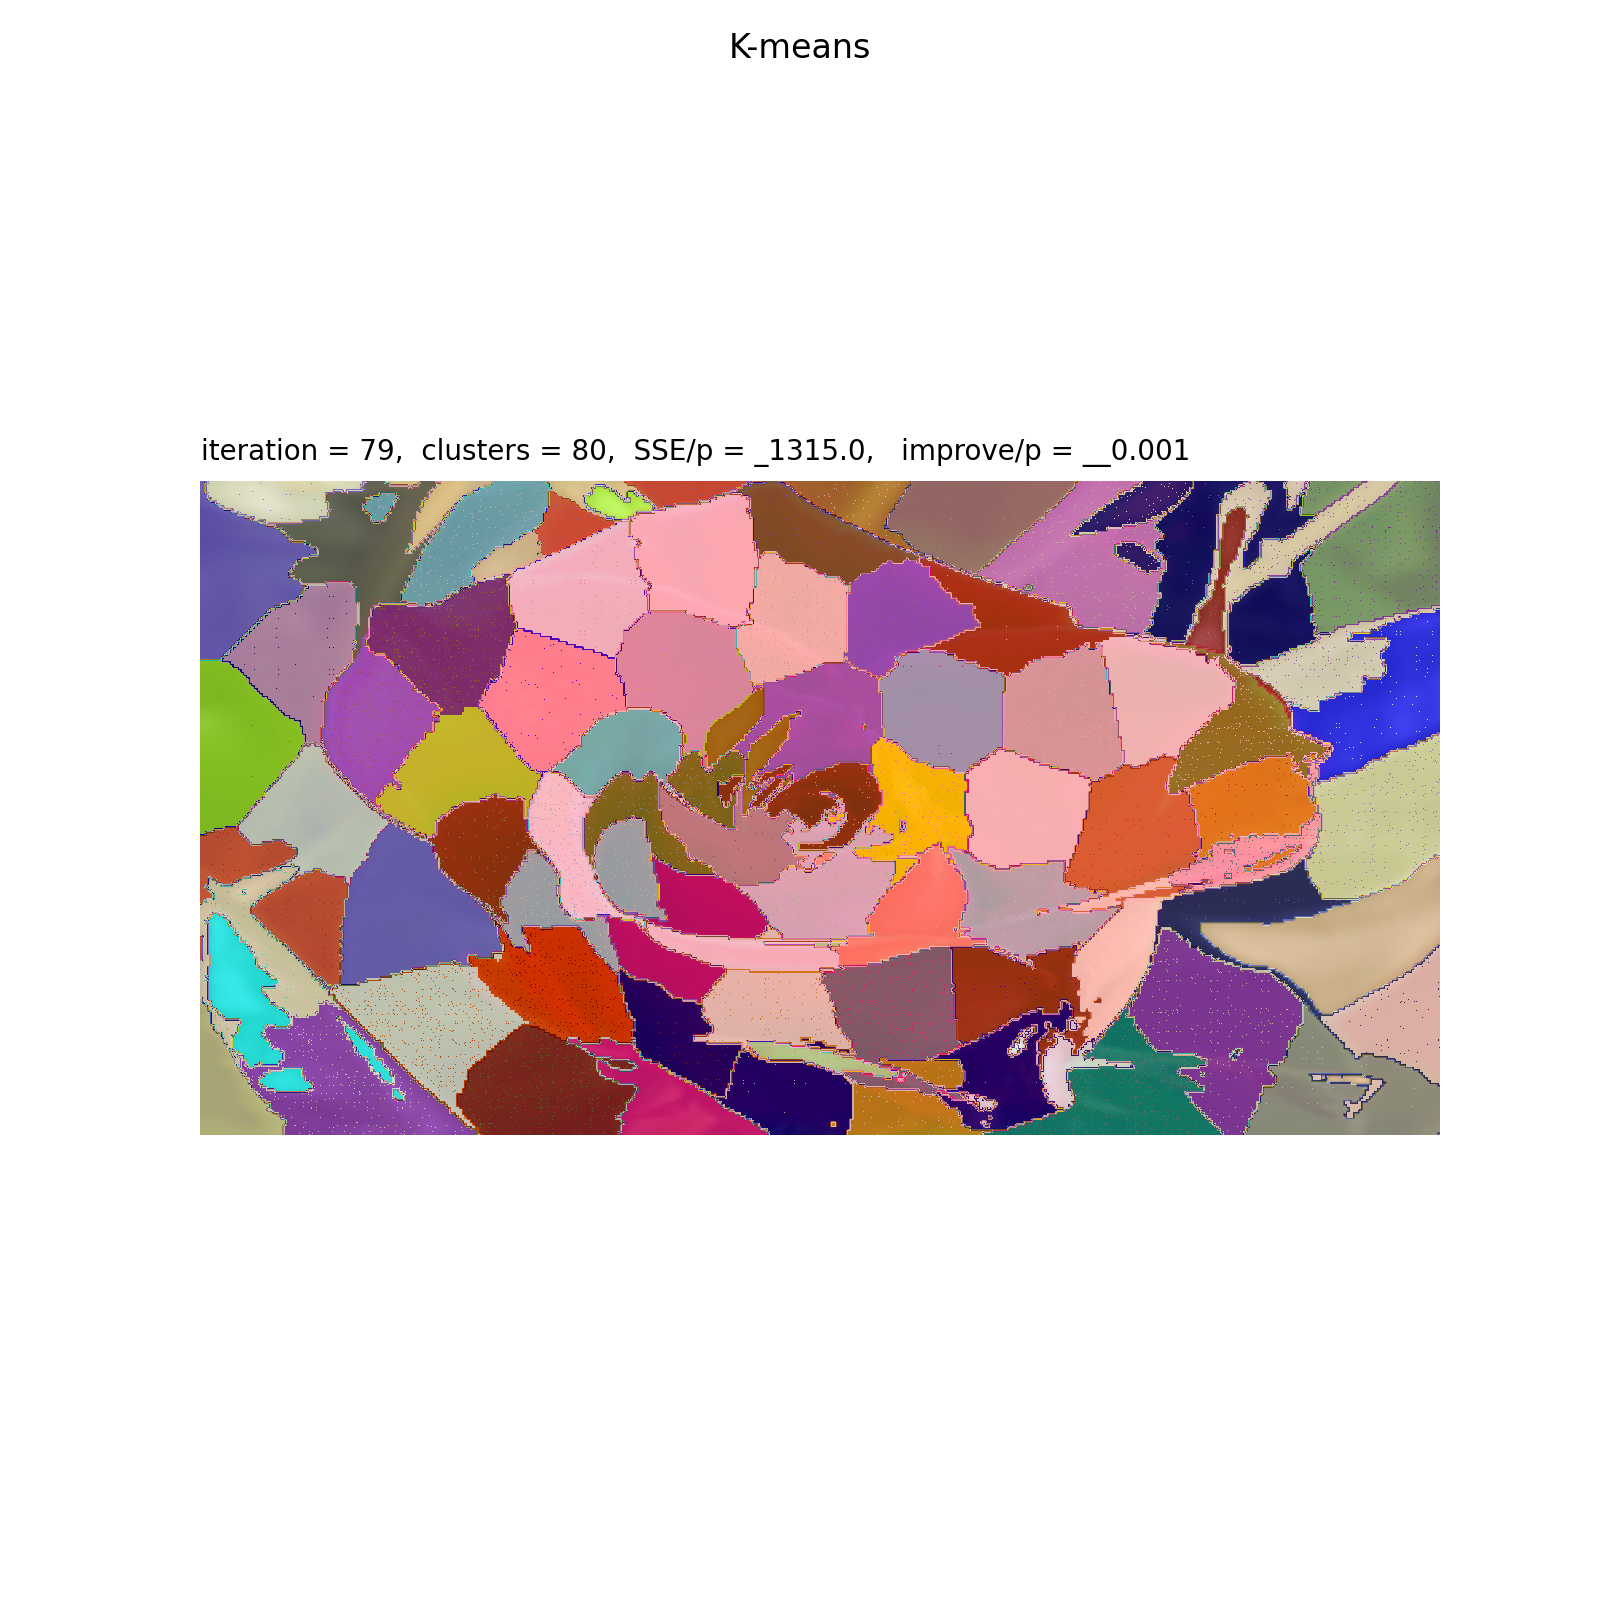

In [3]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=80, weightXY=2.0)
app.run()

Discussion:

Althought we did find 80 clusters, they aren't of the same size. There are many small clusters especially in the middle and towards the bottom right of the rose. Otherwise, you can still see the basic shape of the rose, but it is partioned into too many clusters so these groups aren't very useful to a computer. But it is cool to a human I guess!

<IPython.core.display.Javascript object>


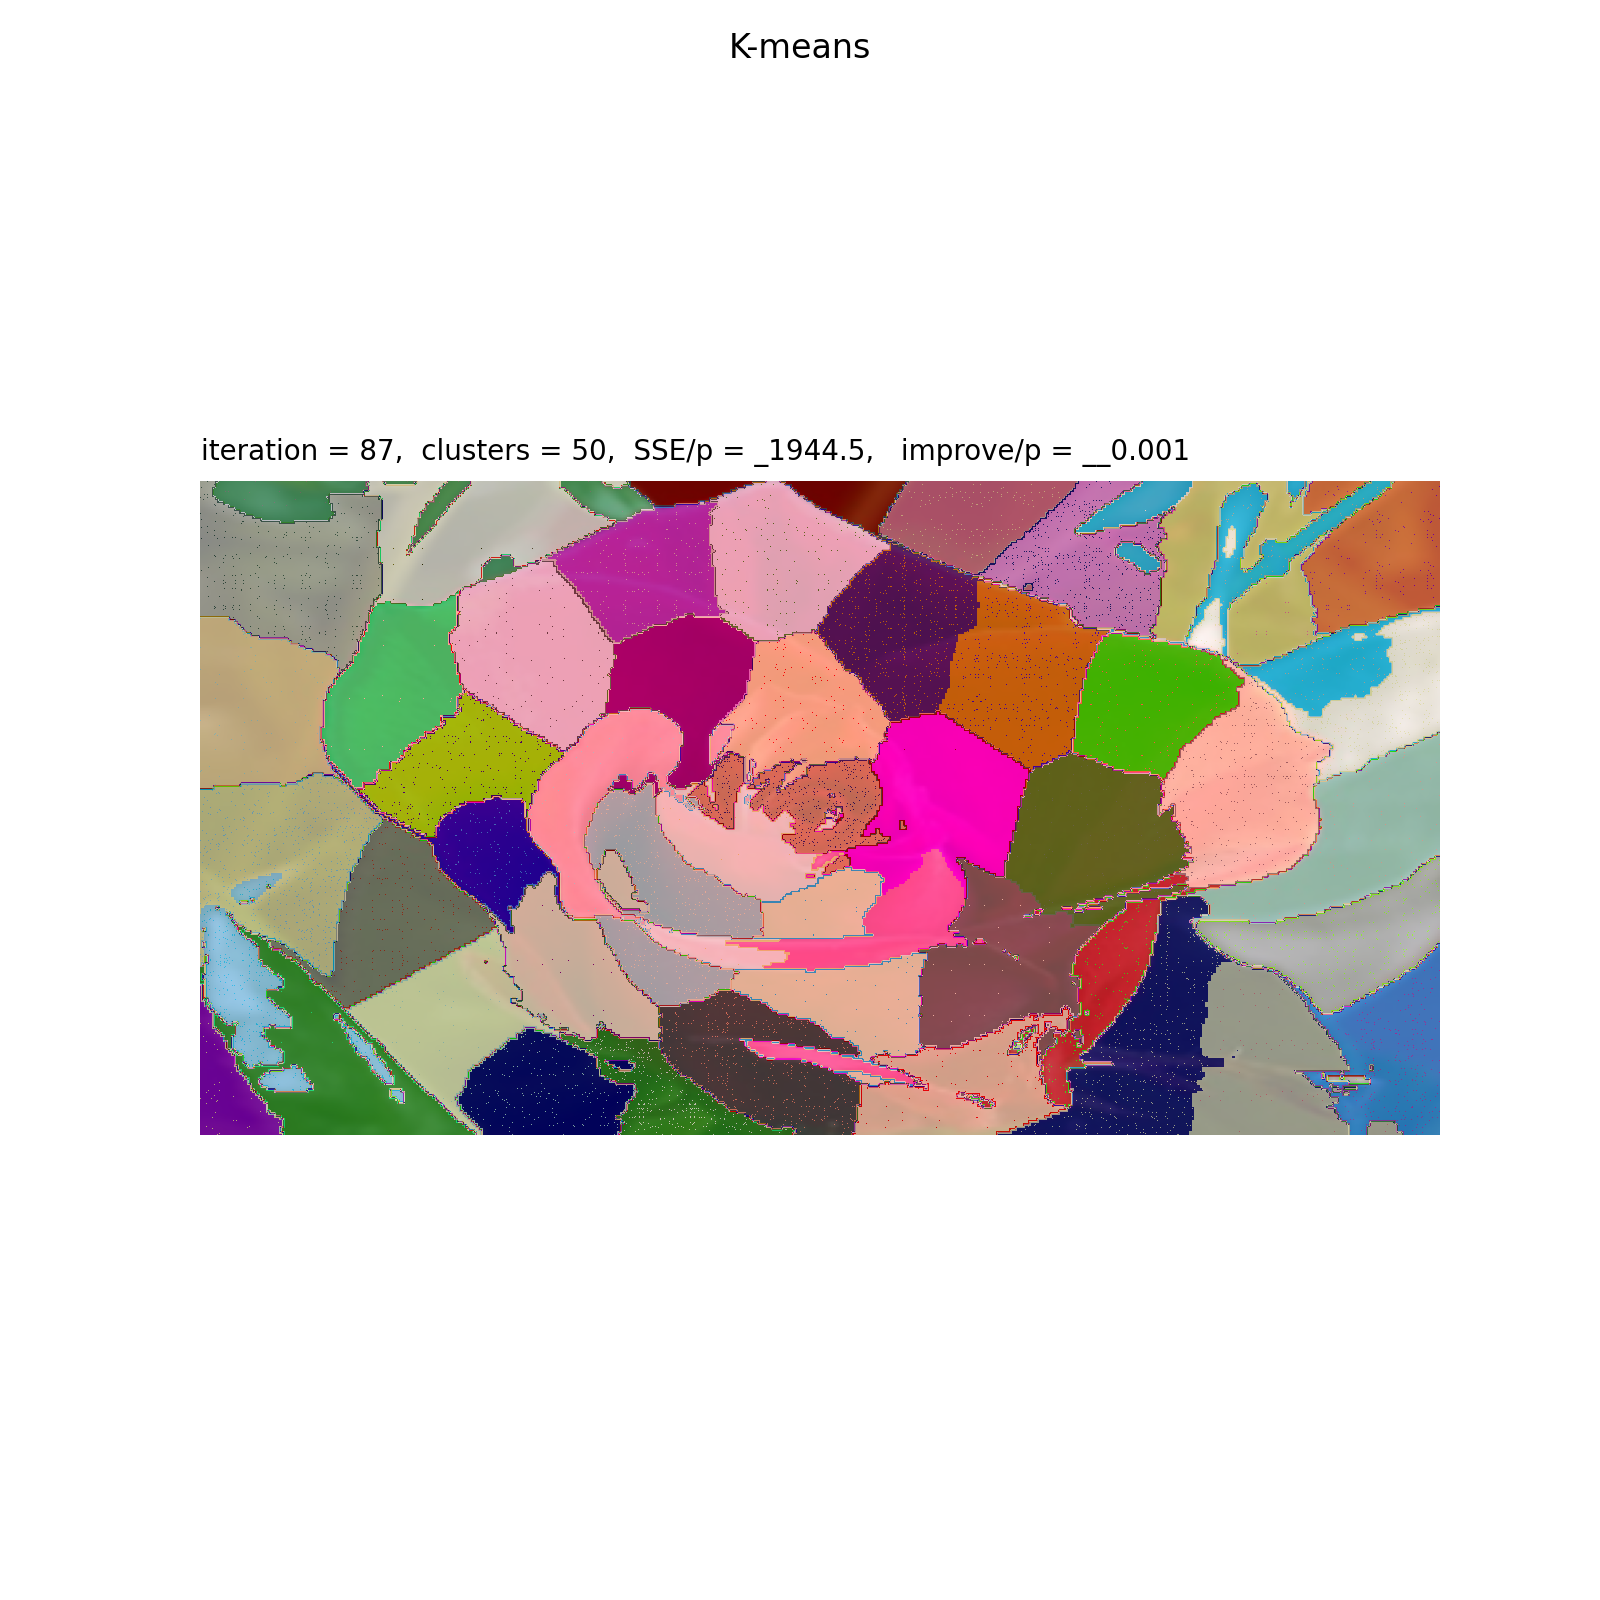

In [4]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=50, weightXY=2.0)
app.run()

Discussion:

The fewer clusters is clearly felt here. There are still some small clusters but overall many clusters have merged to form bigger ones. However the image still doesn't really pick out the rose from the background so it's not exactly helpful. A human can still see the overall shape a little bit.

<IPython.core.display.Javascript object>


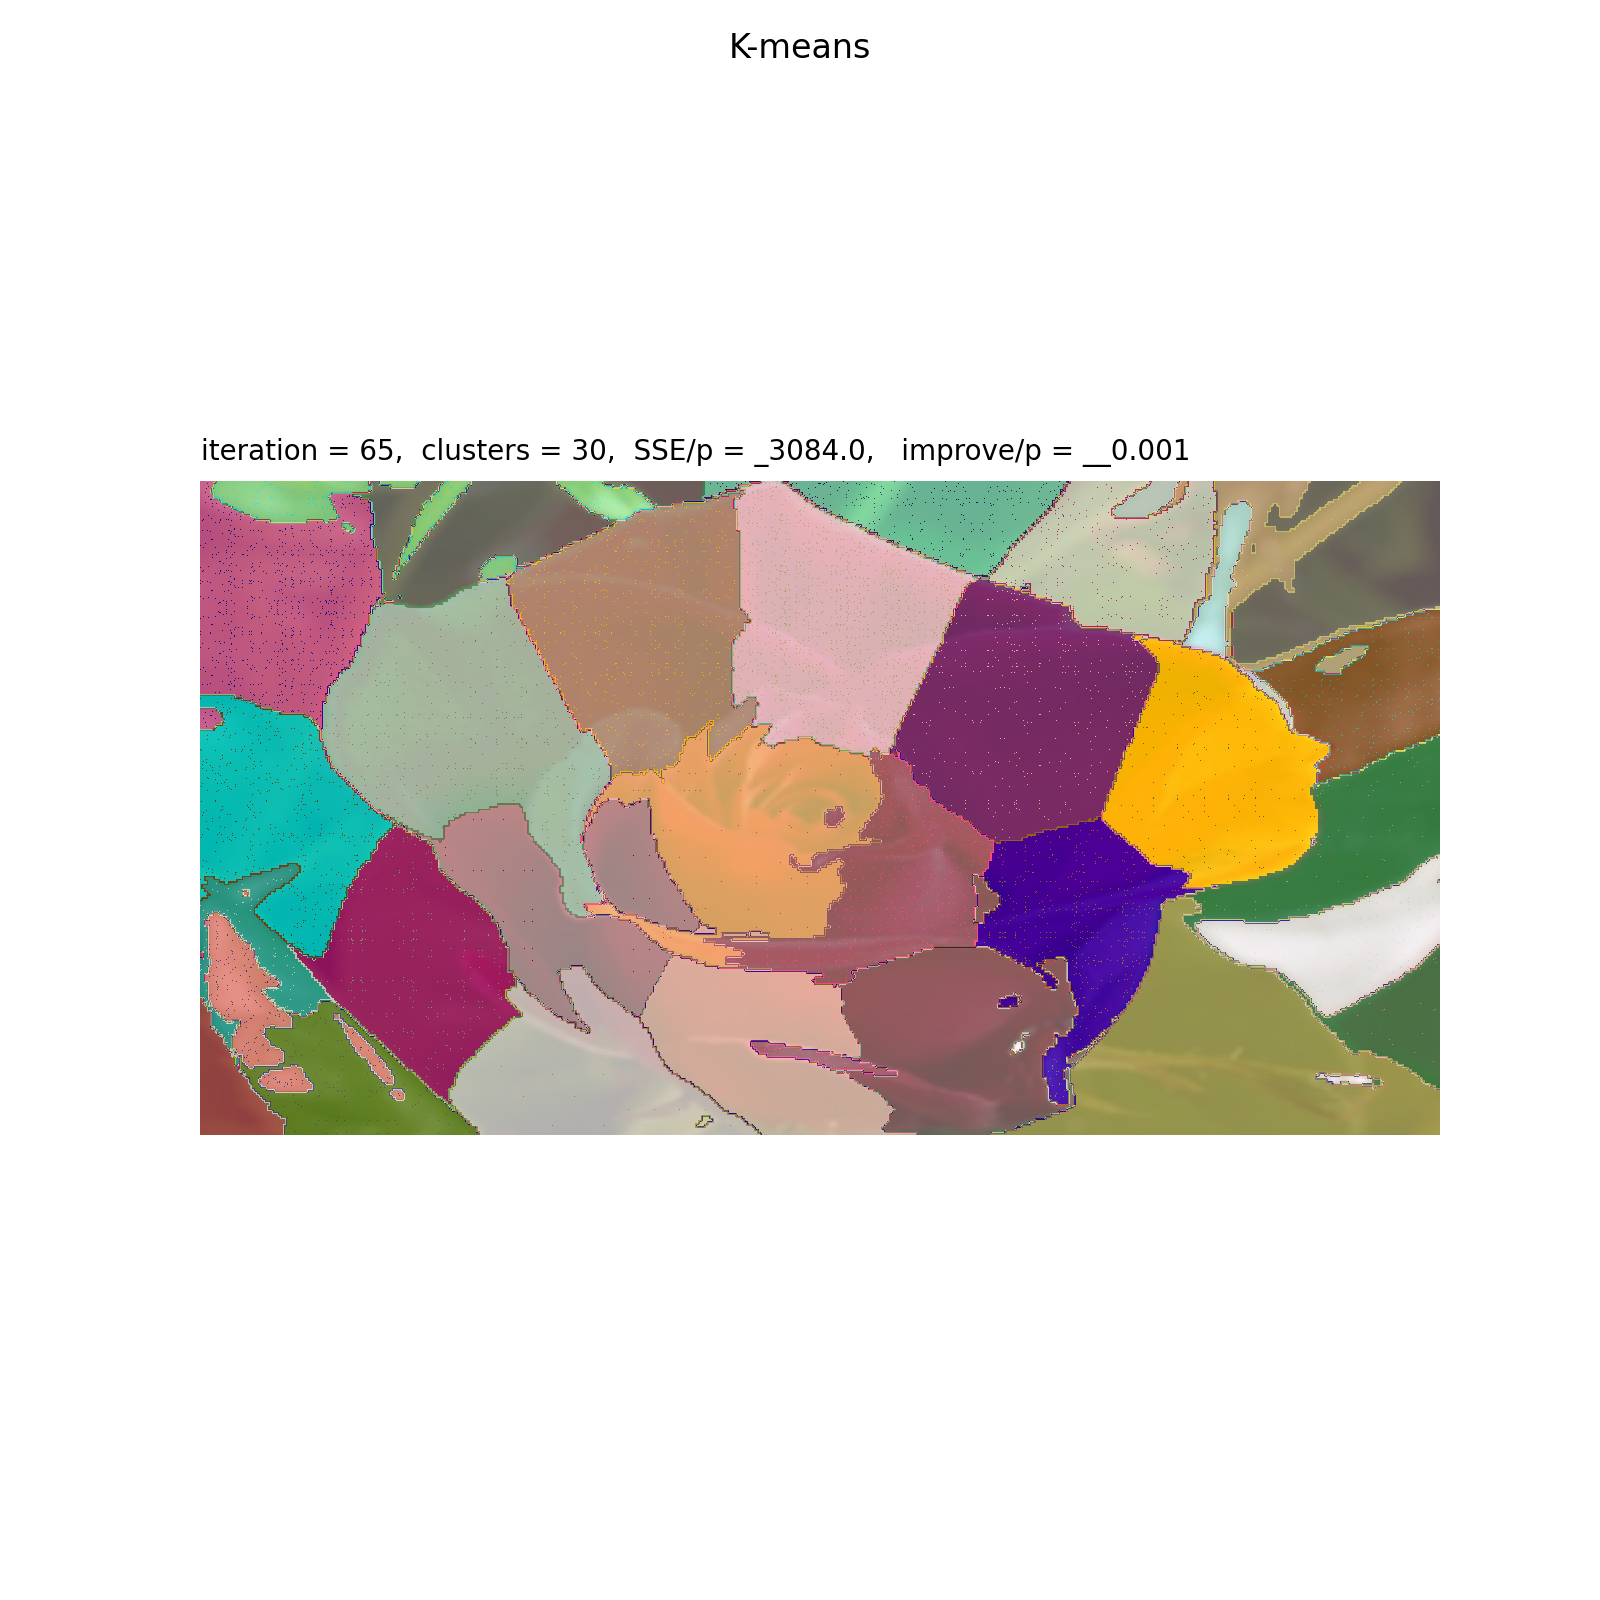

In [5]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=30, weightXY=2.0)
app.run()

Discussion:

Here we start to get a sense of the "superpixel" notion. Bigger clusters result from the fewer clusters here. The upper layer of the petal is defined by only a few clusters as opposed to many small ones like in the pictures above. You kind of see a distinction between the big petals in the back and the middle of the rose with the small petals. These big clusters start to describe the item with just a few "superpixels". However still not ideal because the rose should ideally be one object and the background another.

<IPython.core.display.Javascript object>


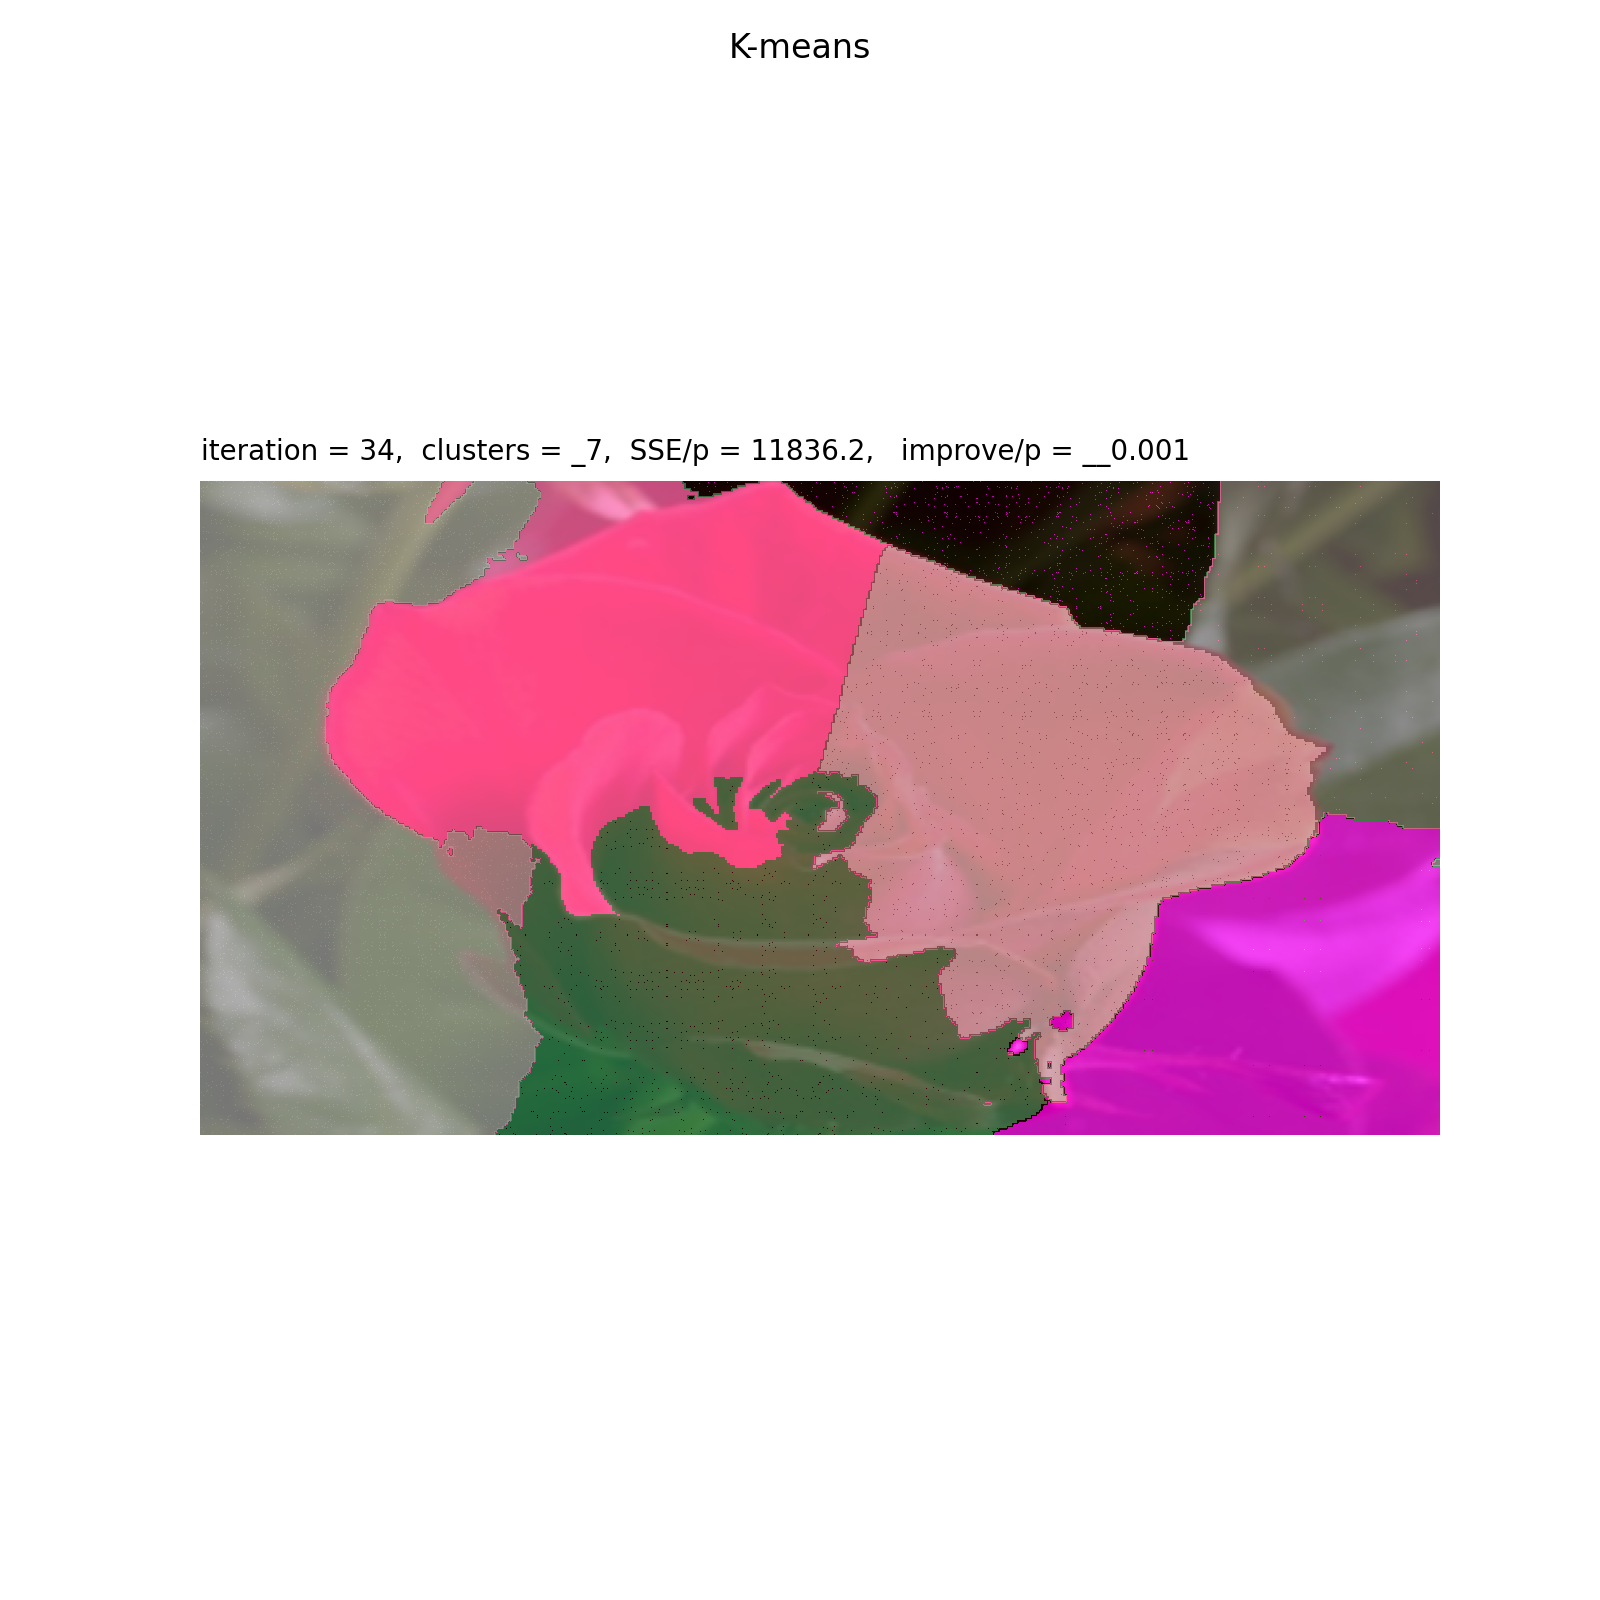

In [6]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=7, weightXY=2.0)
app.run()

Discussion:

At 7 pixels we get a nice result which is effectively identifying the rose with 3 "superpixels" and the background with the remaining 4. We would like to see just 2 groups: the rose and the background so we try 2 next.

<IPython.core.display.Javascript object>


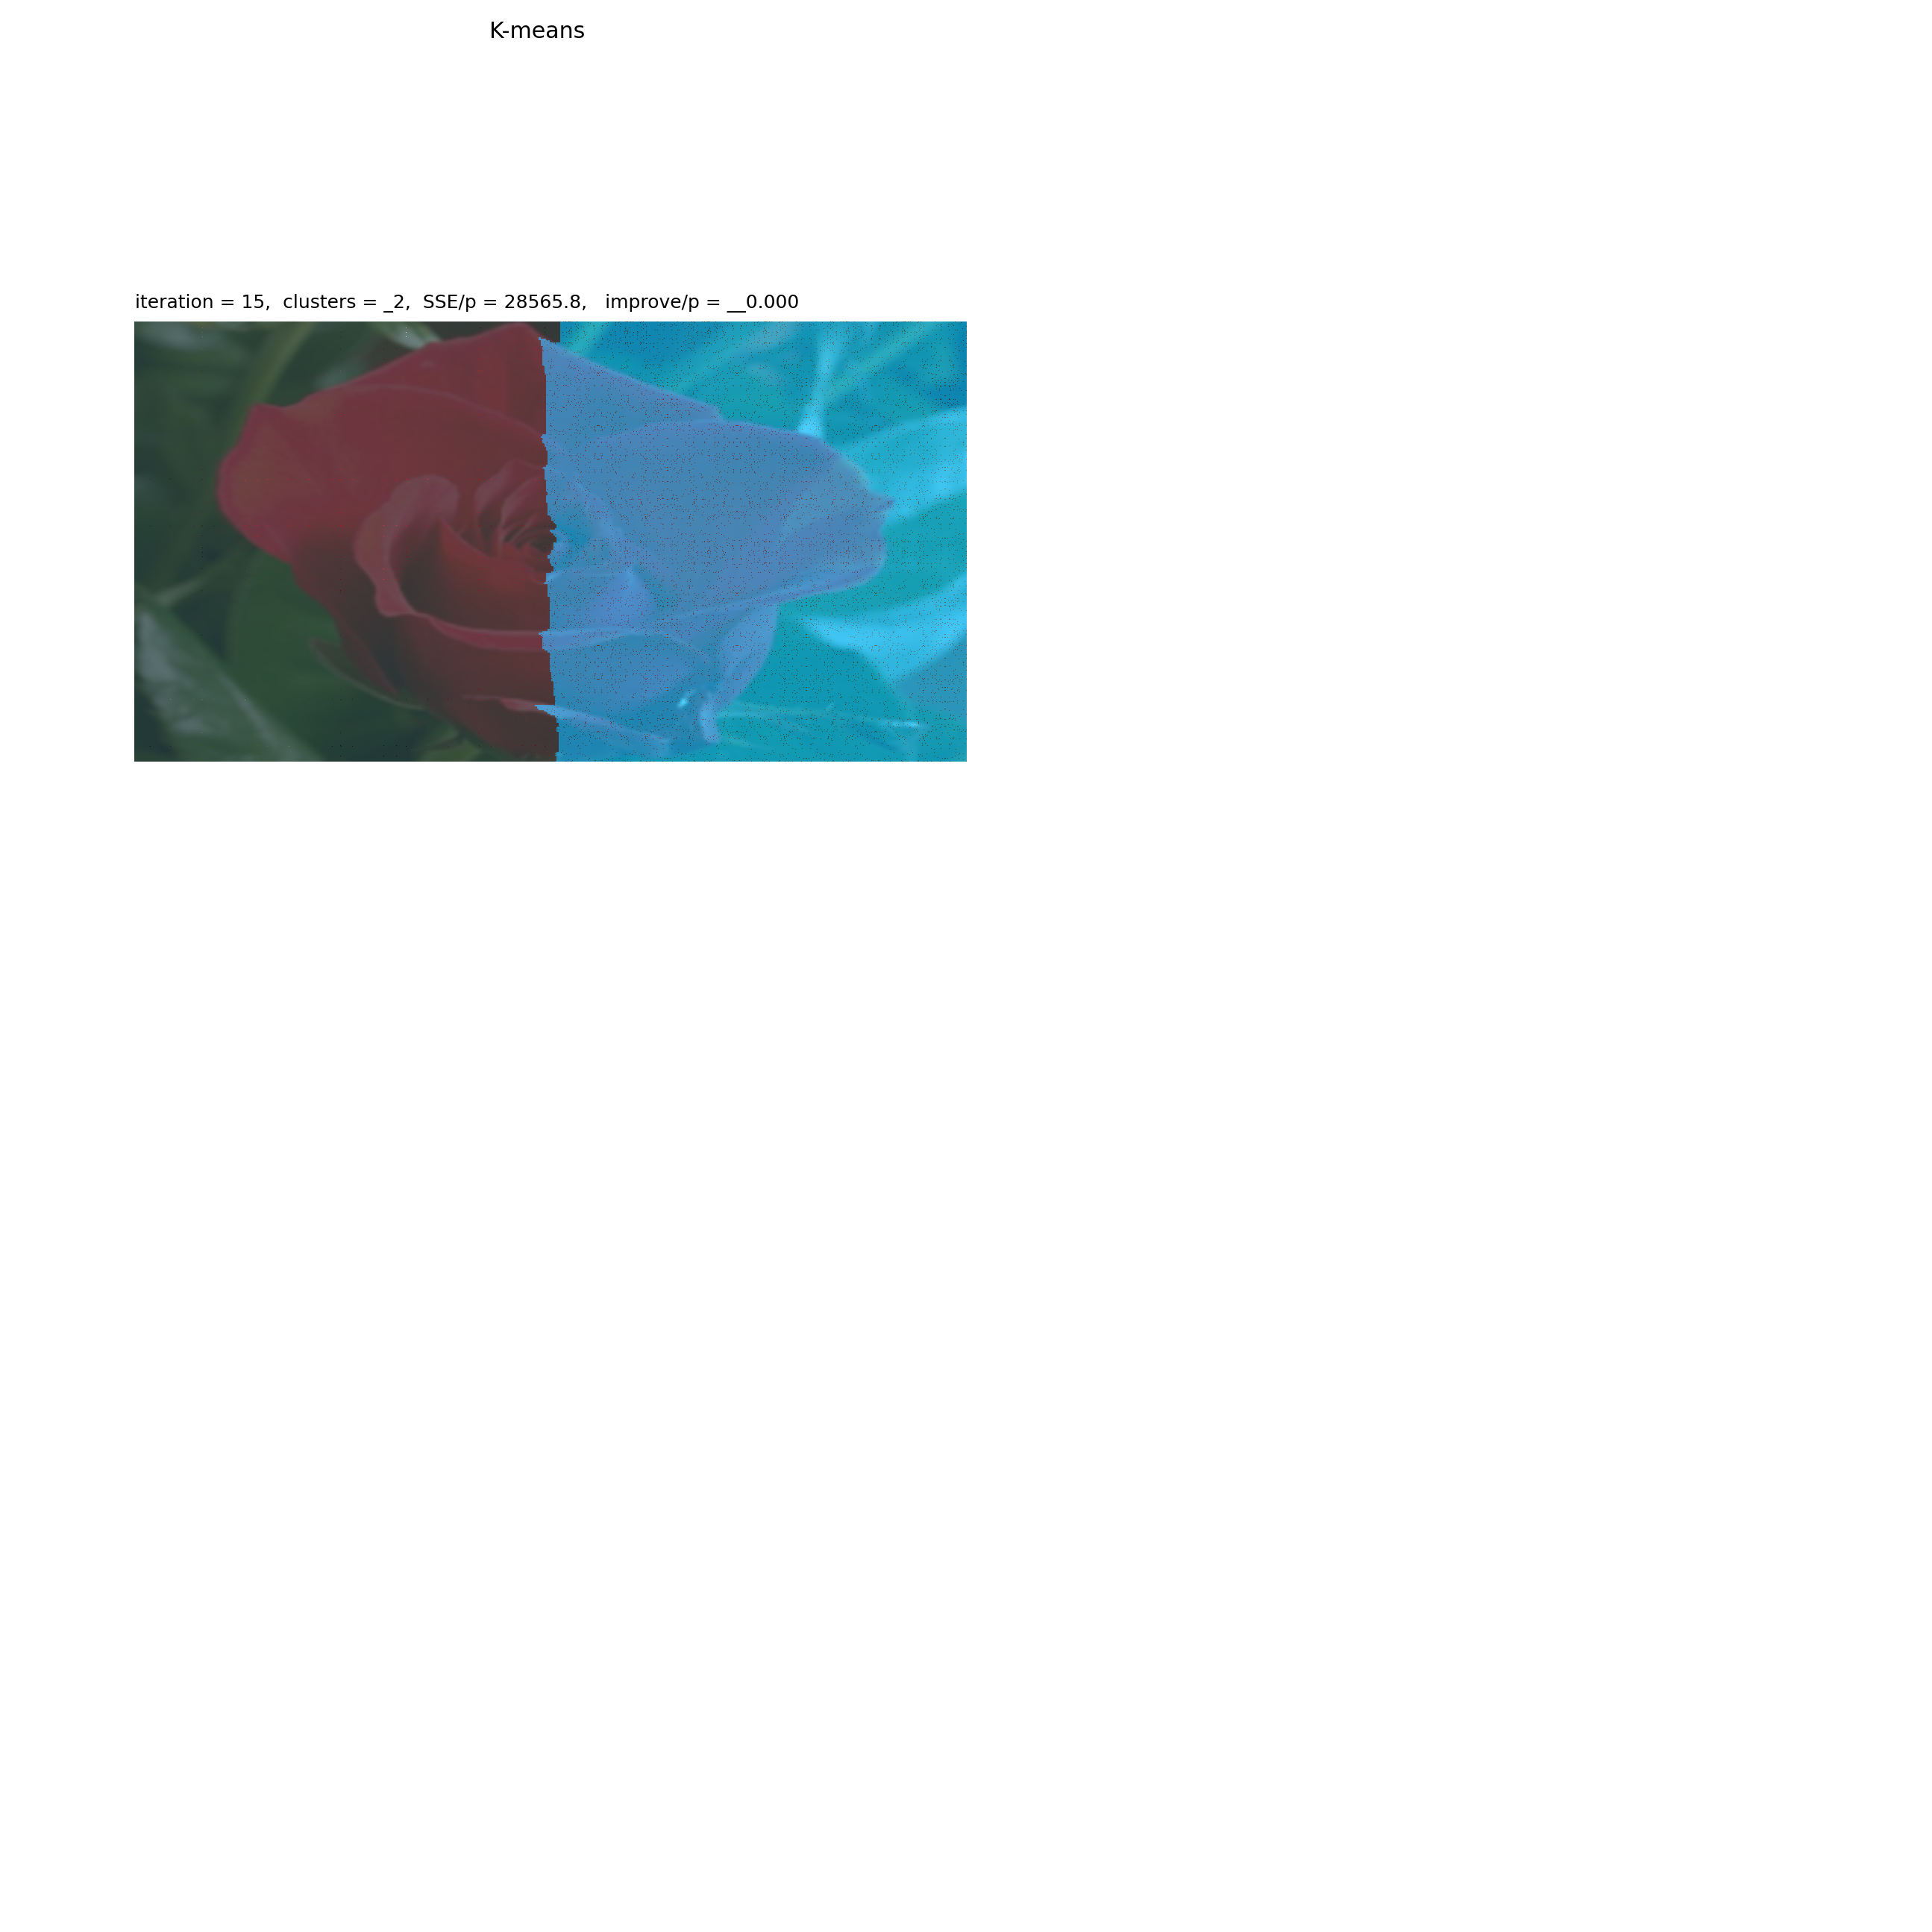

In [19]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=2, weightXY=2.0)
app.run()

Discussion:

Oh, it looks like 2 wasn't a very good idea... it split down the middle in a way that doesn't tell us much. So we try again.

<IPython.core.display.Javascript object>


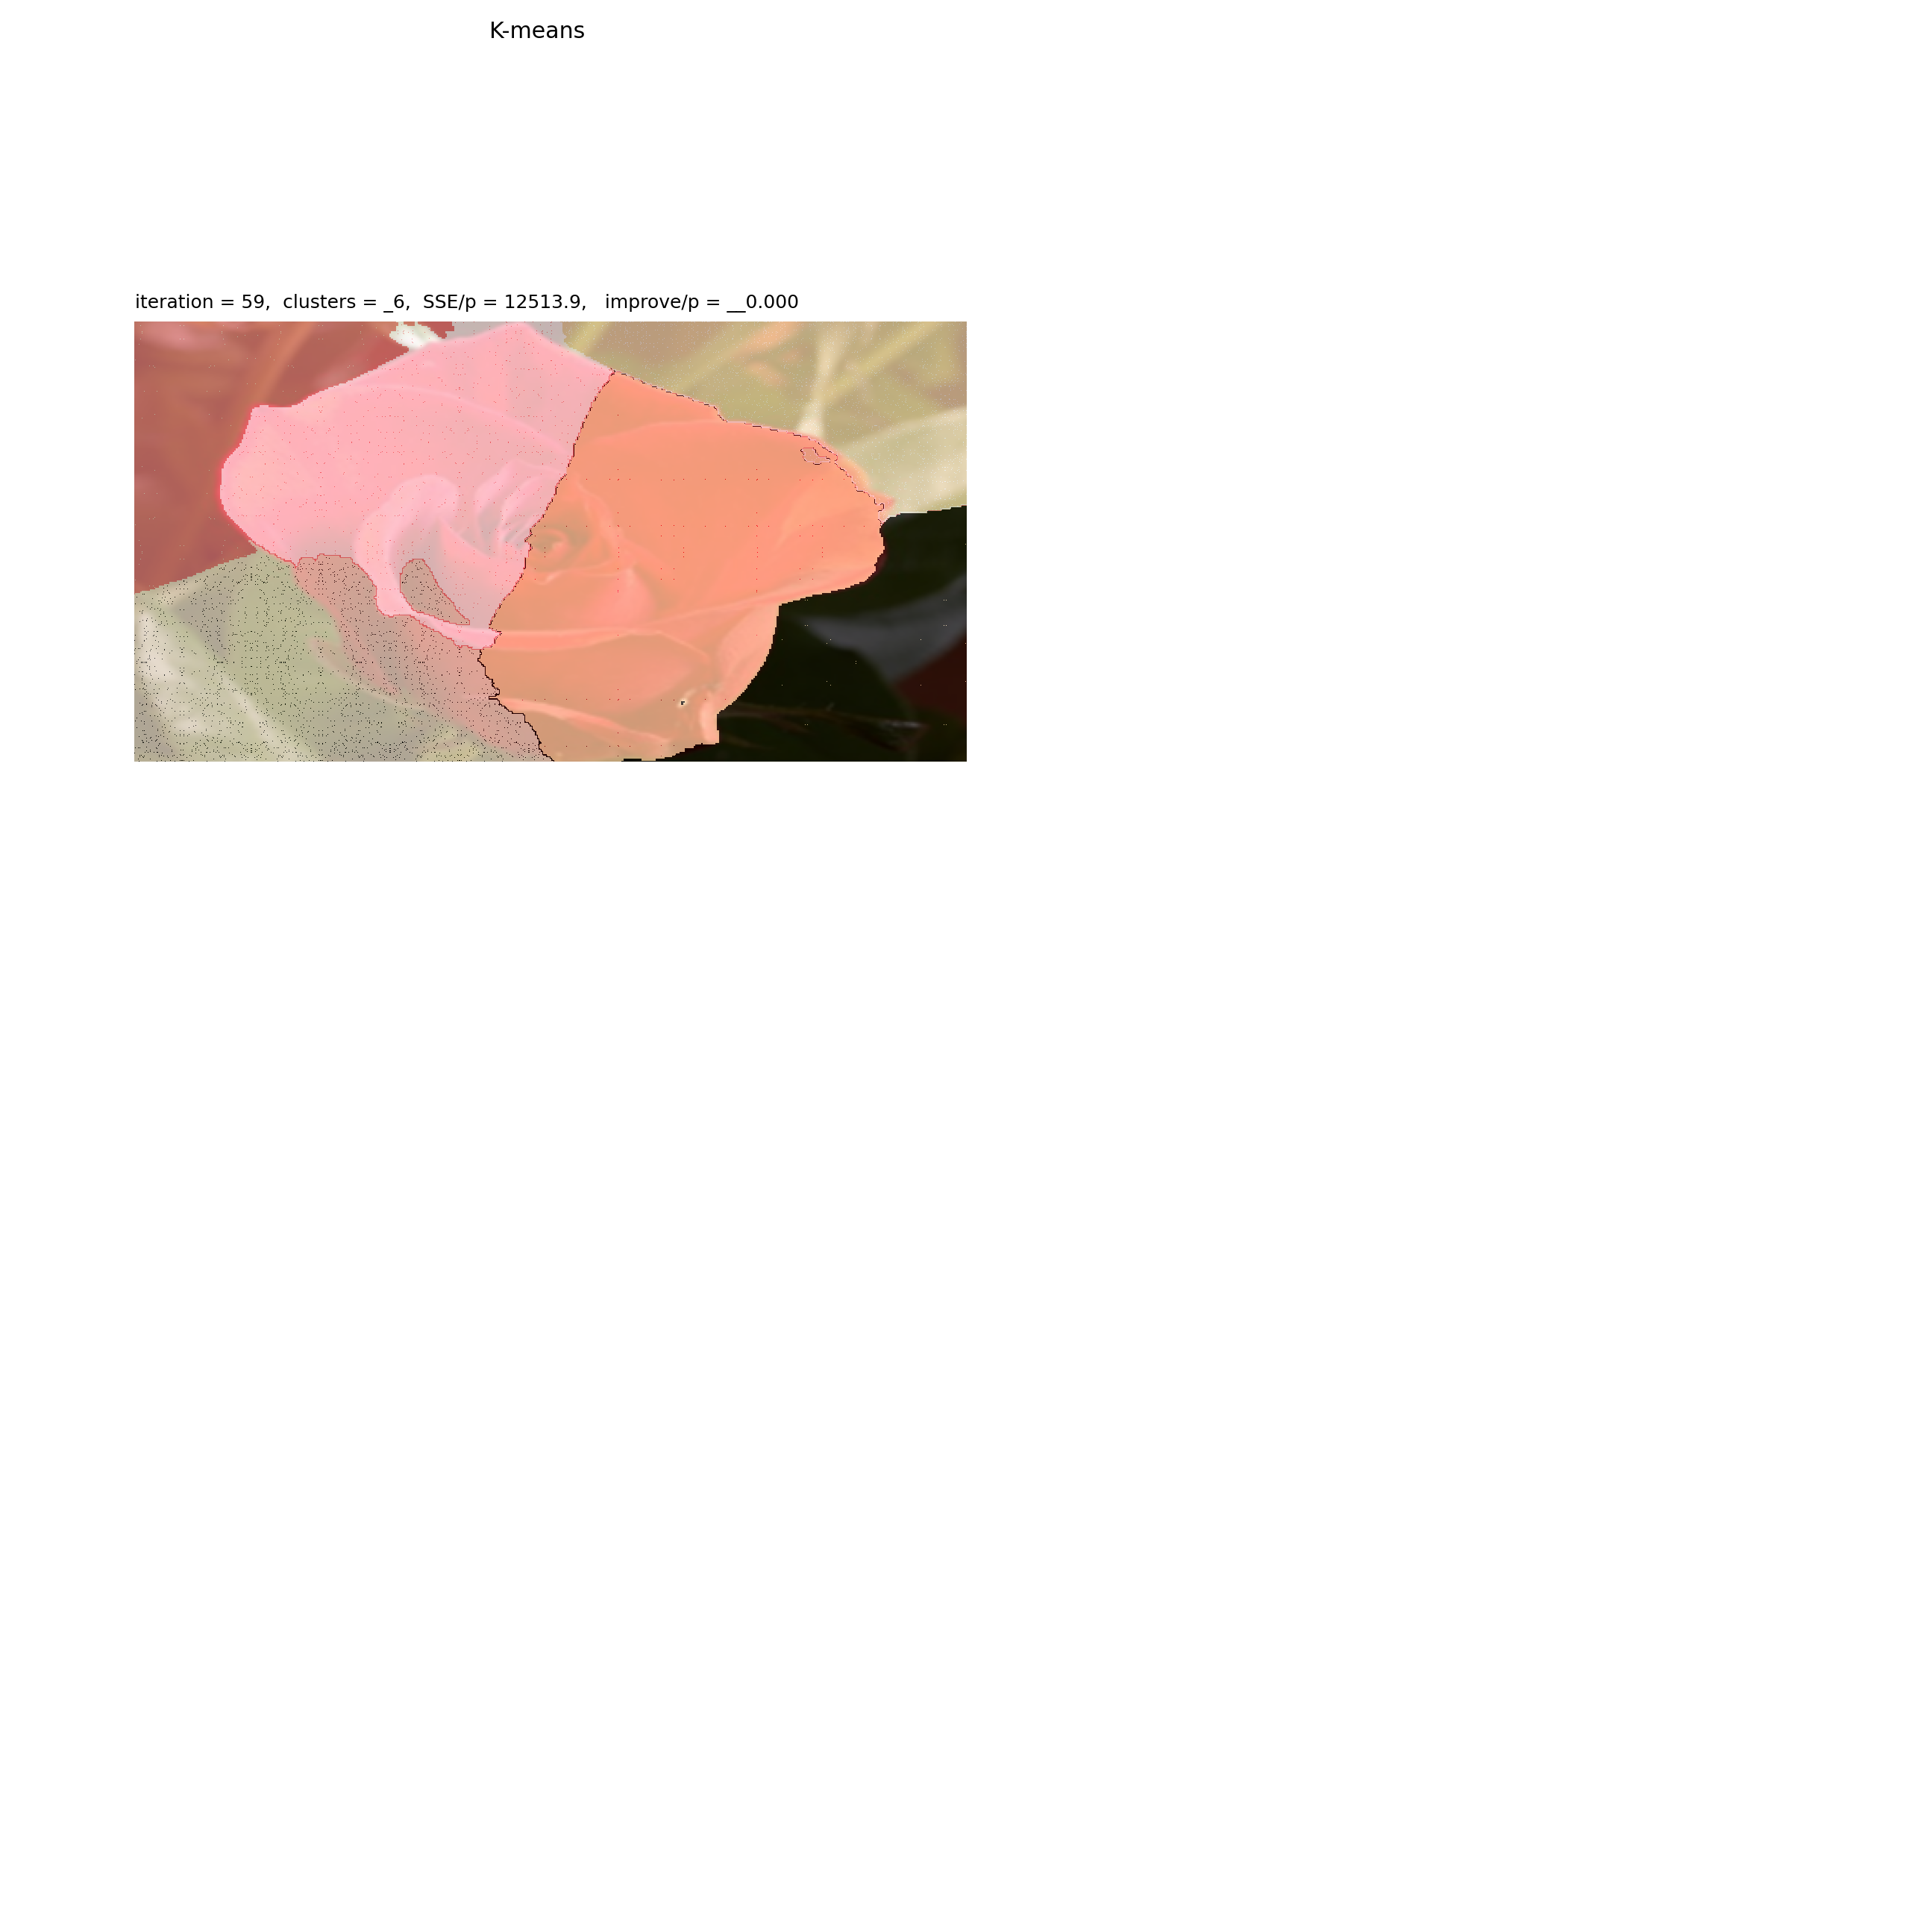

In [23]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=6, weightXY=2.0)
app.run()

Discussion:

After testing with numbers in between, it was found that 6 clusters as shown here was the best we could do to separate the rose object (in this case with only 3 clusters) from the background without missing some parts of the rose.

Conclusions:

More clusters means more detailed information about the borders at which objects change from one item to another. With many clusters we saw details that distinguished the inner parts of the rose with the larger petals surrounding the middle. However this came at the cost of many noisy clusters which don't give much useful information.

If we have too few clusters, we might notice poor results because the algorithm doesn't agree with our perceived grouping (the rose and the background) and instead just tries its best to minimize errors before convergance.

In our results the middle ground with a few clusters was the best option that picked out the rose from the background. These superpixels can be used to identify objects in an image.

Changing w might have put more focus on position of the pixels and improved results but that is discussed more in subproblem 4.3.

### Subprobelm 4.3
### Demonstrate sensitivity of K-means to local minima  (you can use your own images). Show 2-3 different solutions for different random initial means and display the corresponding values of the K-means energy. Add more cells (code and/or text) as necessary. Play wth different weights w and different number of clusters, different images.

<IPython.core.display.Javascript object>


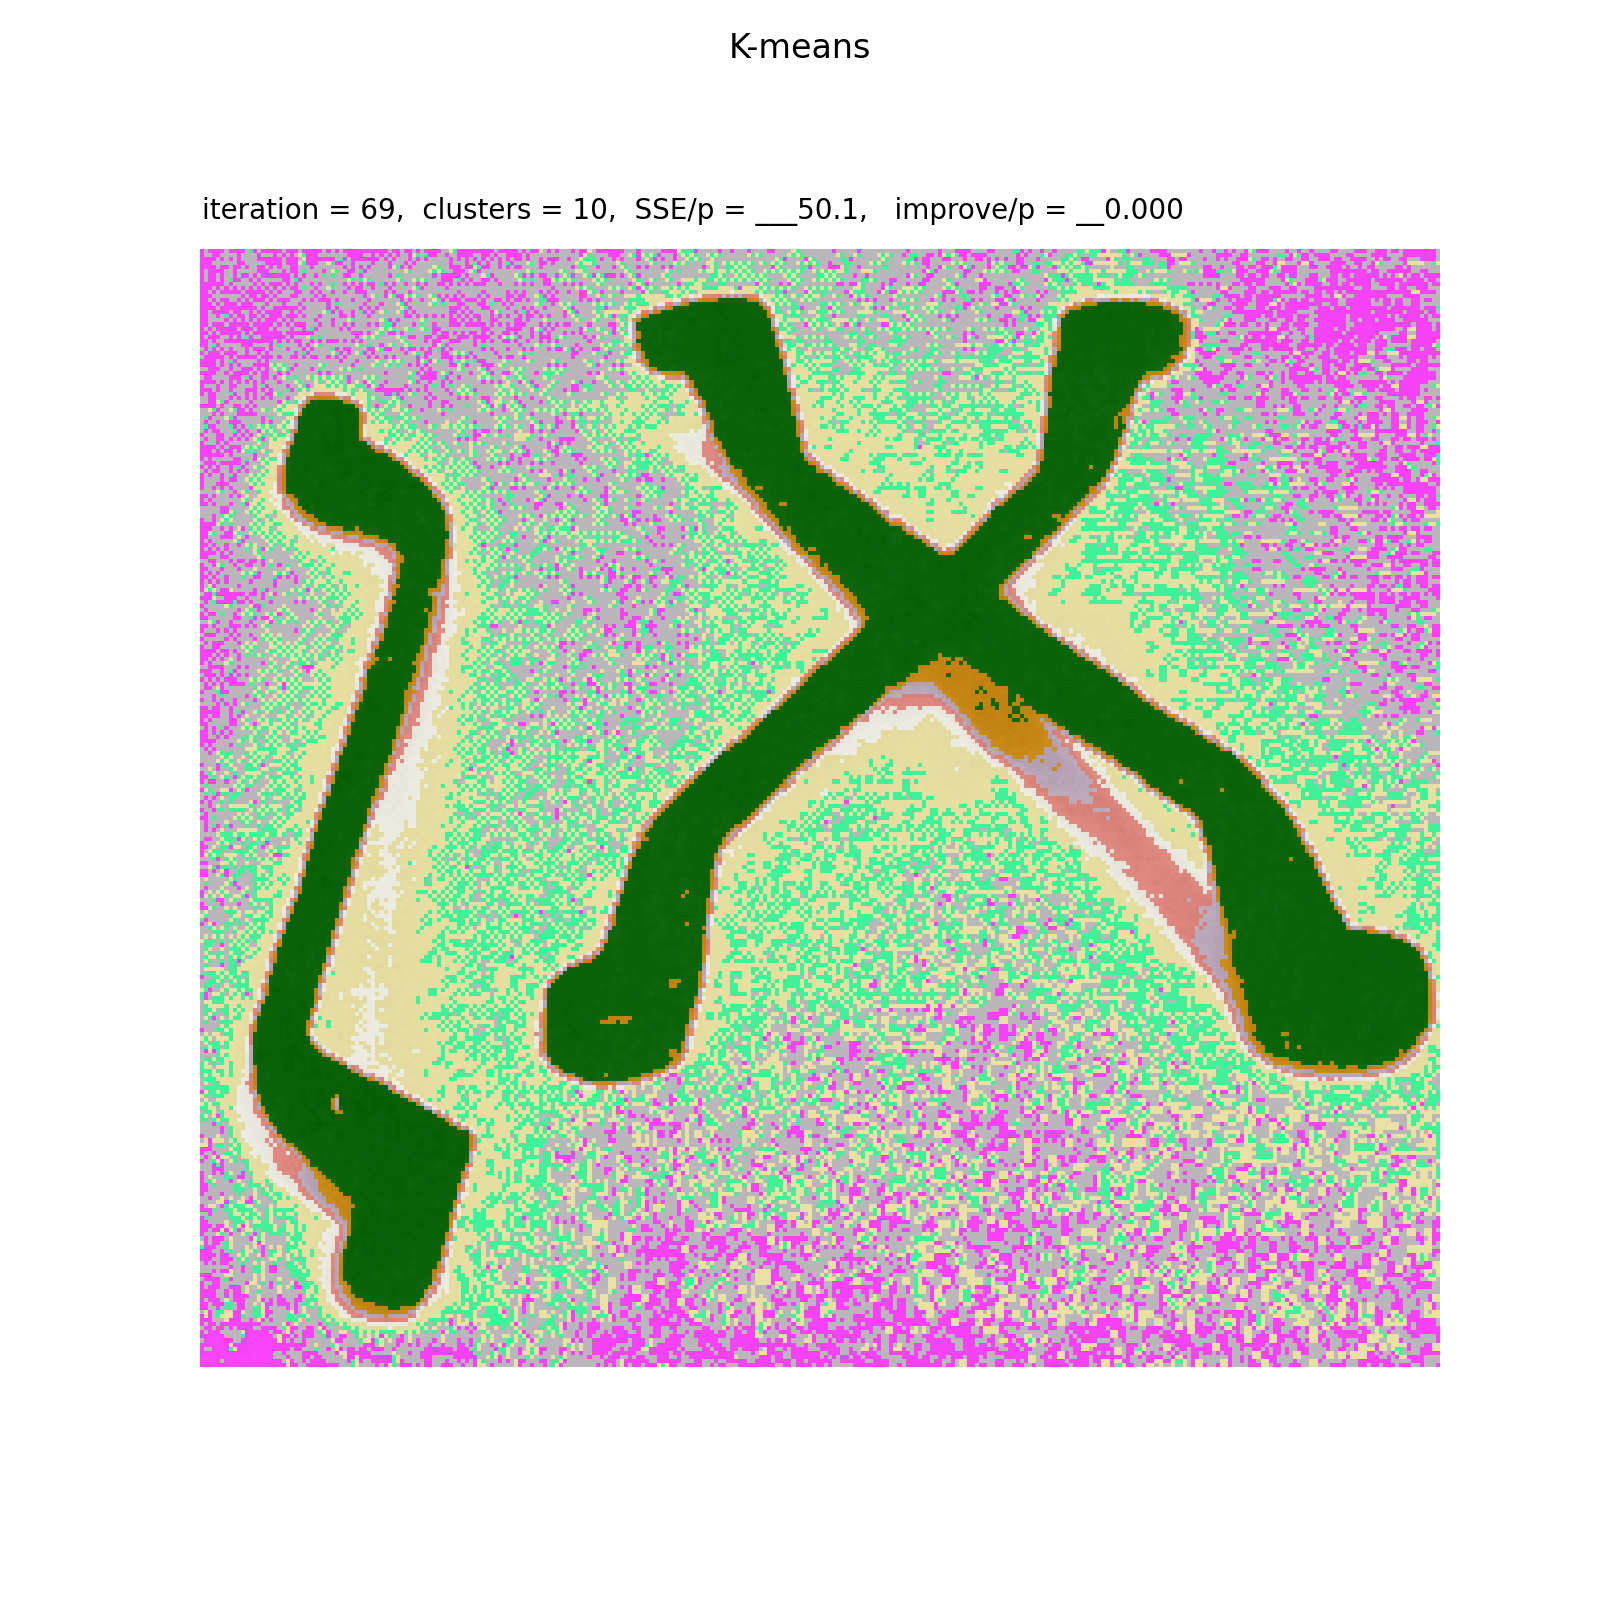

In [11]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=10, weightXY=0.0)
app.run()

Discussion:

In finding a k-means split for this tool image, we used many clusters to showcase the local minima susceptibilty of K-means. By having a random initialization, K-means won't necessarily find the same answer across different runs. K-means will only continue until the change is arbitrairly small and then stop and declare converagance without searching more. That means further that it won't necessarily find the best answer on its first run. This is more likely when there are more clusters because it means different pixels with more features can have a chance of being a representative pixel for a cluster.

First we show our baseline here above. You'll notice that we had to do multiple runs to get interesting differing results because it is possible to get stuck in the same local minima.

In [12]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=10, weightXY=0.0)
app.run()

<IPython.core.display.Javascript object>

Discussion:

In this picture we didn't change any parameters, but when we ran the algorithm again, we got a _higher_ SSE (sum of squared errors). This means it got stuck in a different and _worse_ local minima.

In [13]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=10, weightXY=0.0)
app.run()

<IPython.core.display.Javascript object>

Discussion:

In this picture, we observed the _lowest_ SSE among the 3 test runs. It also found this solution in less iterations. You can see some differences in the shadow below the tool.

Conclusions:

The results of K-means depends a lot on what initial values it got during initialization. Although the differences aren't too large between runs, they are noticable and this means that many attempts may be required to find the best solution without guarantee that the best one is found. This is more of an issue when more clusters are used.

In [14]:
img = plt.imread('images/student/bird_small.png')
app = MyKmeansApp(img, num_clusters=2, weightXY=0.0)
app.run()

<IPython.core.display.Javascript object>

Discussion:

In this example, we use only 2 clusters to identify the groups in an image. K-means did a good job here, because you can still identify the overall bird in the picture. In this example we did not include weighting for the x,y coordinates so it used purely the color features of each pixel.

<IPython.core.display.Javascript object>


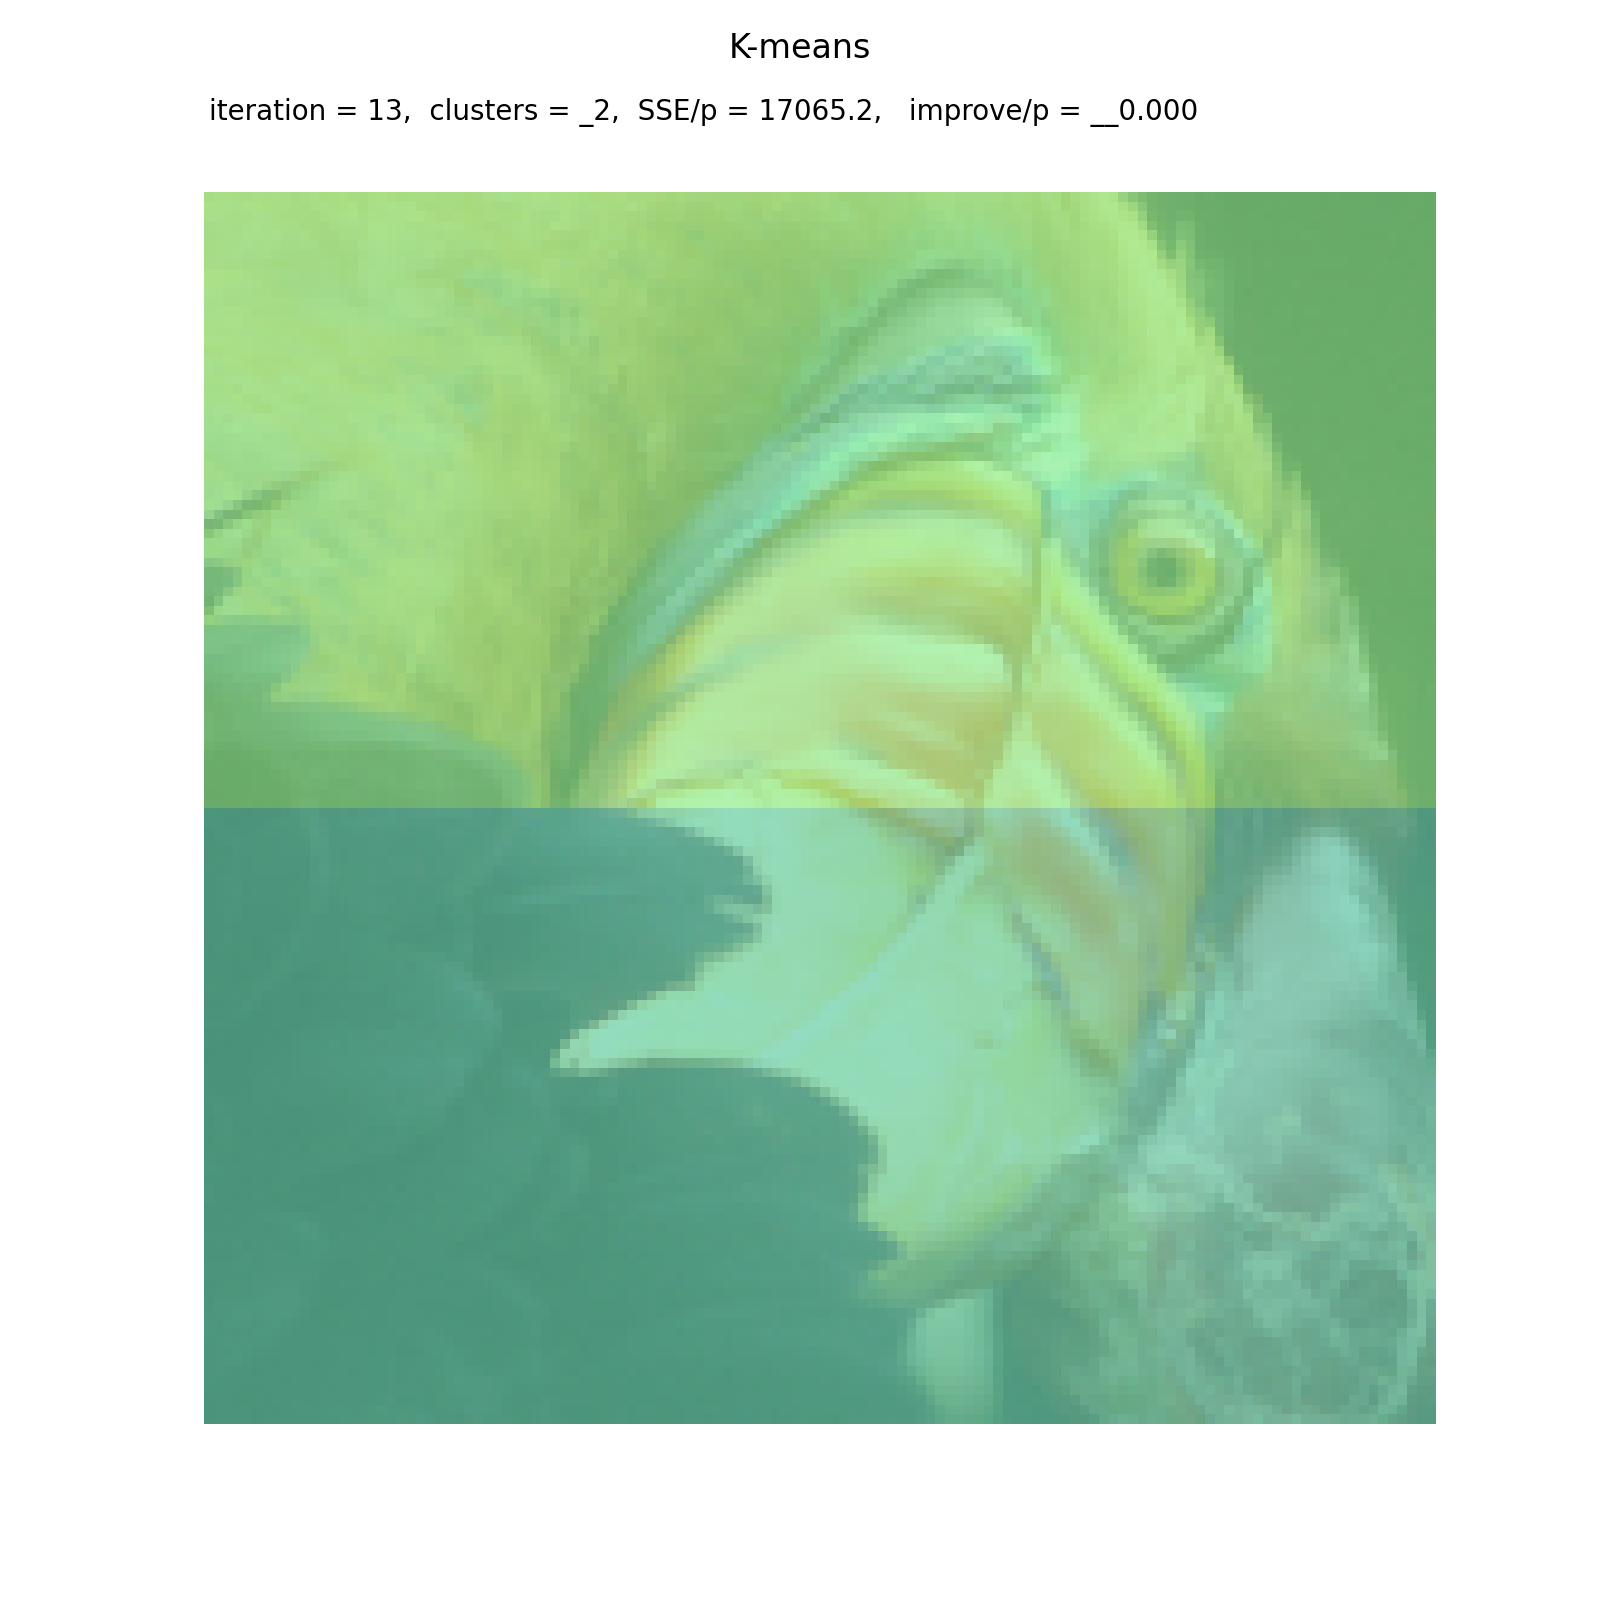

In [15]:
img = plt.imread('images/student/bird_small.png')
app = MyKmeansApp(img, num_clusters=2, weightXY=10.0)
app.run()

Discussion:

In this image, we show how an overdependence on x,y coordinates can seriously hurt results. In terms of their positions, they points are well separated into 2 groups because the bottom pixels are grouped together and the top ones are grouped together. However, lots of the nice distinguishing borders that were found in the picture above have been lost! There should be a balance between the two in terms of finding appropriate groups.

In [16]:
img = plt.imread('images/student/bird_small.png')
app = MyKmeansApp(img, num_clusters=6, weightXY=0.0)
app.run()

<IPython.core.display.Javascript object>

Discussion:

In this picture we add more clusters which gives us more features of the bird. It helps us separate the break, the eyes, the body, and the background better than the 2 cluster case. Again we do not consider pixel positions.

<IPython.core.display.Javascript object>


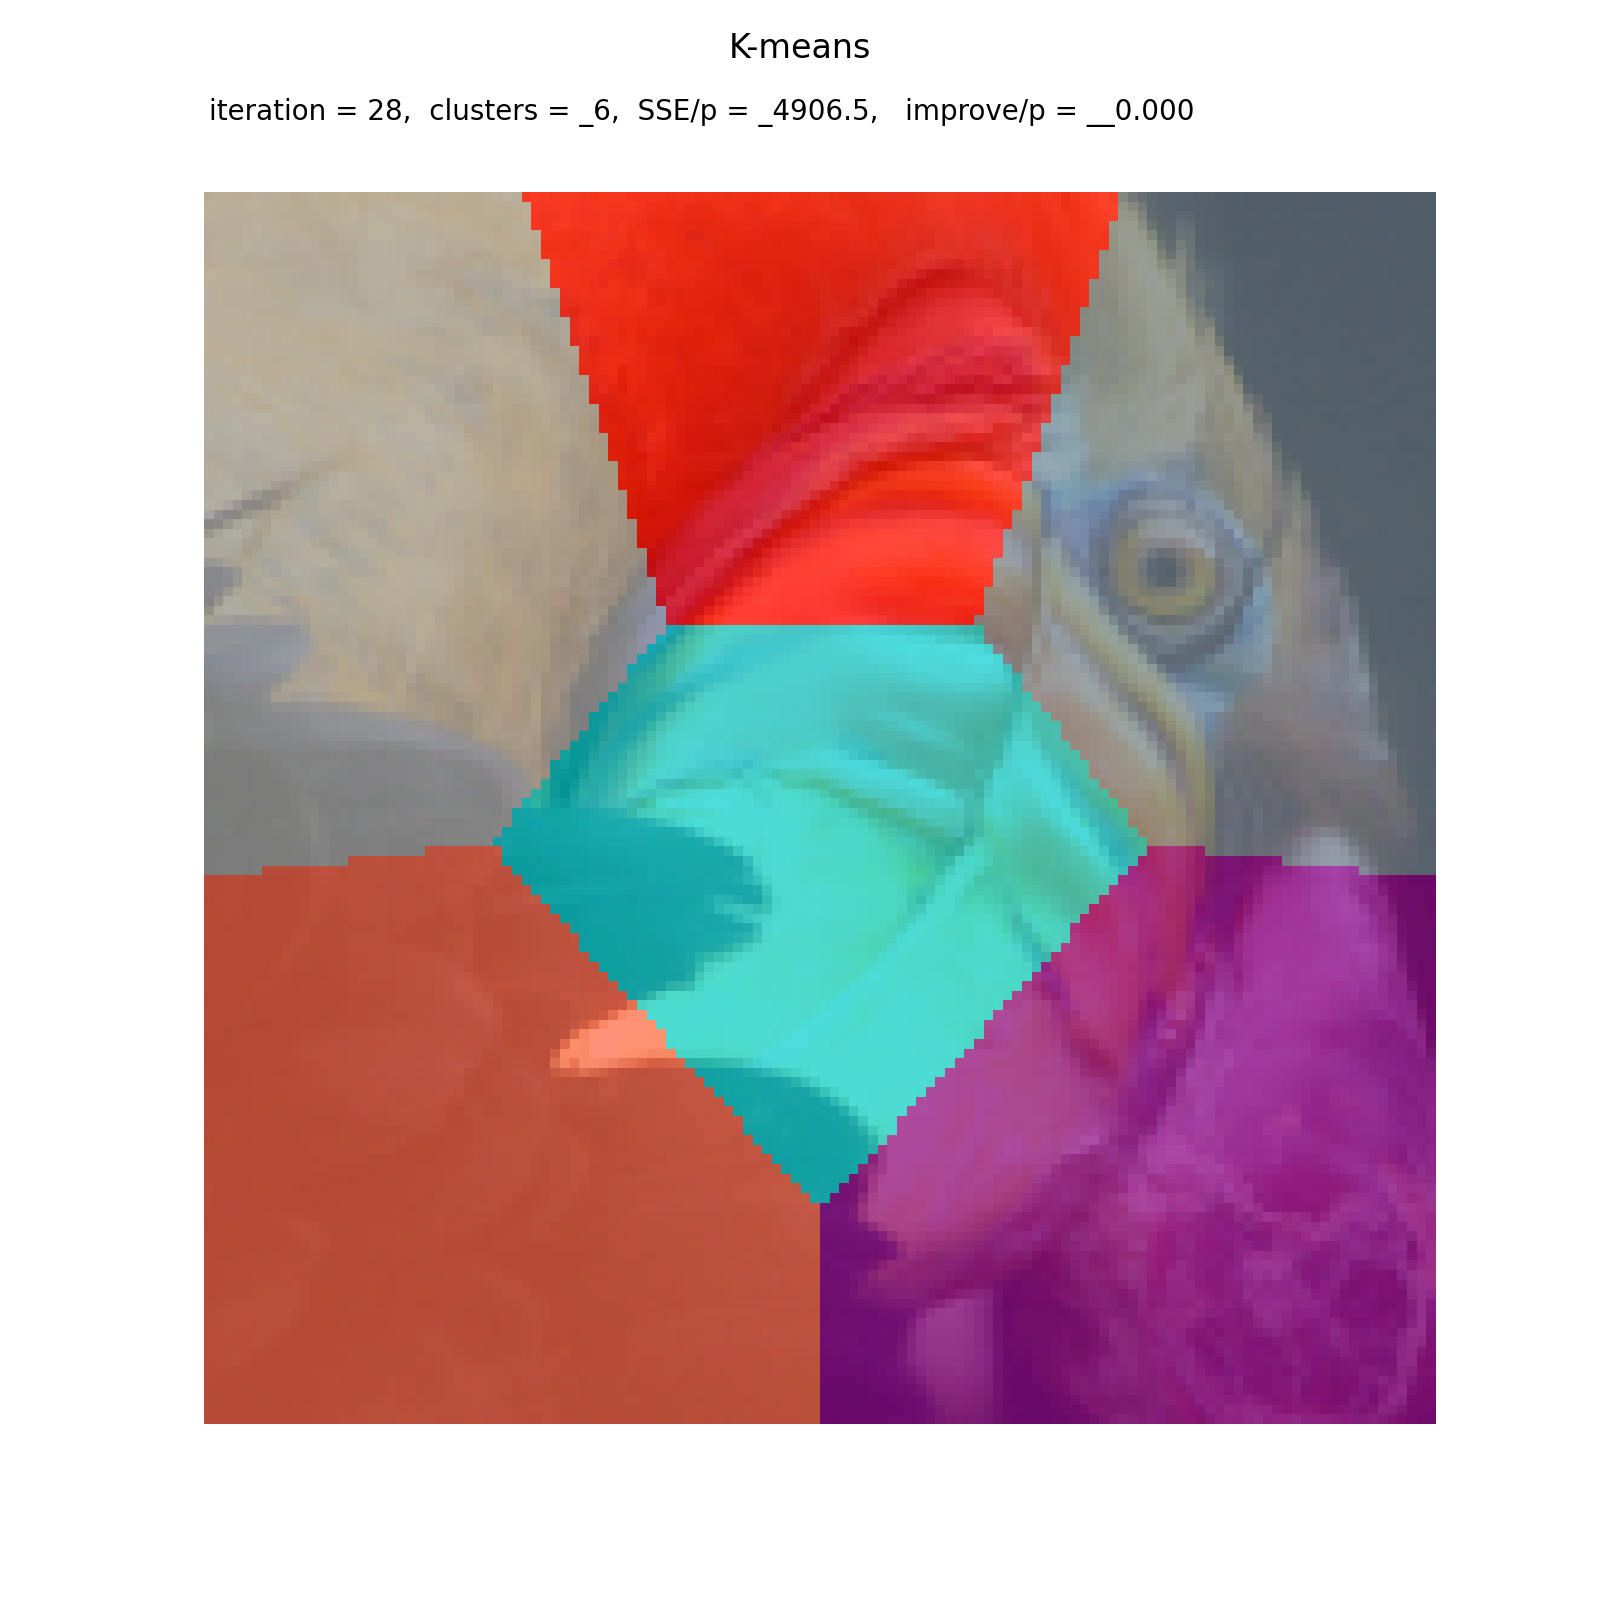

In [17]:
img = plt.imread('images/student/bird_small.png')
app = MyKmeansApp(img, num_clusters=6, weightXY=10.0)
app.run()

Discussion:

Finally in this picture we see an overdependence on the positions of the pixels. With a high weight on them we stop caring about features and instead K-mean focuses on grouping pixels which are _close_ to each other. We get clusters that have groupings that minimize the errors between pixels, but many features of the bird are lost.

Conclusions:

Here again, we see that more clusters means more features being distinguished by the clusters. These images also revealed that the weighting w could seriously affect results. Large values of w were able to ignore the nice feature results from some images and make it so that the clusters focused really hard on minimizing the distance between points based on their x,y coordinates.

Although x,y coordinates should be helpful, a better balance needs to be found so that the features of the objects can still be observed.